# Including necessar Libraries required

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # for splling data int train and test data
from sklearn.linear_model import LinearRegression #to perform linearRegression operations

# Reading the given CSV file

In [2]:
housing_data = pd.read_csv('E://NCI//Statistics for Data Analytics/housing.csv')
housing_data #checking whether the data has been read

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0              141     31770    OneFam   One_Story        Average        1960   
1               80     11622    OneFam   One_Story  Above_Average        1961   
2               81     14267    OneFam   One_Story  Above_Average        1958   
3               93     11160    OneFam   One_Story        Average        1968   
4               74     13830    OneFam   Two_Story        Average        1997   
...            ...       ...       ...         ...            ...         ...   
2408            37      7937    OneFam        SLvl  Above_Average        1984   
2409             0      8885    OneFam   One_Story        Average        1983   
2410            62     10441    OneFam      SFoyer        Average        1992   
2411            77     10010    OneFam   One_Story        Average        1974   
2412            74      9627    OneFam   Two_Story        Average        1993   

     Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0       Typical           1080          1656              0          1   
1       Typical            882           896              0          1   
2       Typical           1329          1329              0          1   
3       Typical           2110          2110              0          2   
4       Typical            928           928            701          2   
...         ...            ...           ...            ...        ...   
2408    Typical           1003          1003              0          1   
2409    Typical            864           902              0          1   
2410    Typical            912           970              0          1   
2411    Typical           1389          1389              0          1   
2412    Typical            996           996           1004          2   

      Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude  \
0             0              3              1           2 -93.619754   
1             0              2              1           0 -93.619756   
2             1              3              1           0 -93.619387   
3             1              3              1           2 -93.617320   
4             1              3              1           1 -93.638933   
...         ...            ...            ...         ...        ...   
2408          0              3              1           0 -93.604776   
2409          0              2              1           0 -93.602680   
2410          0              3              1           0 -93.606847   
2411          0              2              1           1 -93.600190   
2412          1              3              1           1 -93.599996   

       Latitude  Sale_Price  
0     42.054035      215000  
1     42.053014      105000  
2     42.052659      172000  
3     42.051245      244000  
4     42.060899      189900  
...         ...         ...  
2408  41.988964      142500  
2409  41.988314      131000  
2410  41.986510      132000  
2411  41.990921      170000  
2412  41.989265      188000  

[2413 rows x 18 columns]

# EDA for given data

## Checking the data count in dataframe number of instances and features, non-null values count, null values count

In [3]:
housing_data.shape 
housing_data.info() 
housing_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

## Understanding the data

In [4]:
housing_data.describe()

Lot_Frontage       Lot_Area   Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count   2413.000000    2413.000000  2413.000000    2413.000000   2413.000000   
mean      55.462495   10060.208040  1969.436386    1022.827600   1133.857024   
std       33.542416    8222.759854    29.487943     408.977848    366.442470   
min        0.000000    1300.000000  1872.000000       0.000000    334.000000   
25%       37.000000    7390.000000  1953.000000     784.000000    866.000000   
50%       60.000000    9360.000000  1971.000000     970.000000   1060.000000   
75%       77.000000   11404.000000  1998.000000    1246.000000   1350.000000   
max      313.000000  215245.000000  2010.000000    3206.000000   3820.000000   

       Second_Flr_SF    Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count    2413.000000  2413.000000  2413.000000    2413.000000    2413.000000   
mean      339.242851     1.539163     0.377953       2.854538       1.040199   
std       423.198488     0.544667     0.498467       0.813430       0.200642   
min         0.000000     0.000000     0.000000       0.000000       0.000000   
25%         0.000000     1.000000     0.000000       2.000000       1.000000   
50%         0.000000     2.000000     0.000000       3.000000       1.000000   
75%       704.000000     2.000000     1.000000       3.000000       1.000000   
max      1872.000000     4.000000     2.000000       6.000000       3.000000   

        Fireplaces    Longitude     Latitude     Sale_Price  
count  2413.000000  2413.000000  2413.000000    2413.000000  
mean      0.602984   -93.642391    42.033730  175567.643183  
std       0.648911     0.026159     0.018015   70979.614441  
min       0.000000   -93.693153    41.986498   35000.000000  
25%       0.000000   -93.661562    42.021547  129500.000000  
50%       1.000000   -93.640326    42.034569  159000.000000  
75%       1.000000   -93.621485    42.047997  206900.000000  
max       4.000000   -93.577427    42.063381  755000.000000

## Checking the skewnness of numerical variable

In [5]:
from scipy.stats import skew

numeric_features=housing_data.select_dtypes(include=['number']).columns
for i, column in enumerate(numeric_features):  # Exclude the 'Sale_Price' column
    skewness = skew(housing_data[column])
    print(f"Skewness of {column}: {skewness}")

Skewness of Lot_Frontage: -0.08106402380836052
Skewness of Lot_Area: 13.385593081237493
Skewness of Year_Built: -0.5863593106167835
Skewness of Total_Bsmt_SF: 0.45610204308998054
Skewness of First_Flr_SF: 1.0426523952716684
Skewness of Second_Flr_SF: 0.8036178490279292
Skewness of Full_Bath: 0.24486055951409358
Skewness of Half_Bath: 0.663579563835415
Skewness of Bedroom_AbvGr: 0.18404423881937823
Skewness of Kitchen_AbvGr: 4.678663509737174
Skewness of Fireplaces: 0.7386159194662122
Skewness of Longitude: -0.33730287443398965
Skewness of Latitude: -0.5074624075041824
Skewness of Sale_Price: 1.7442728887821093


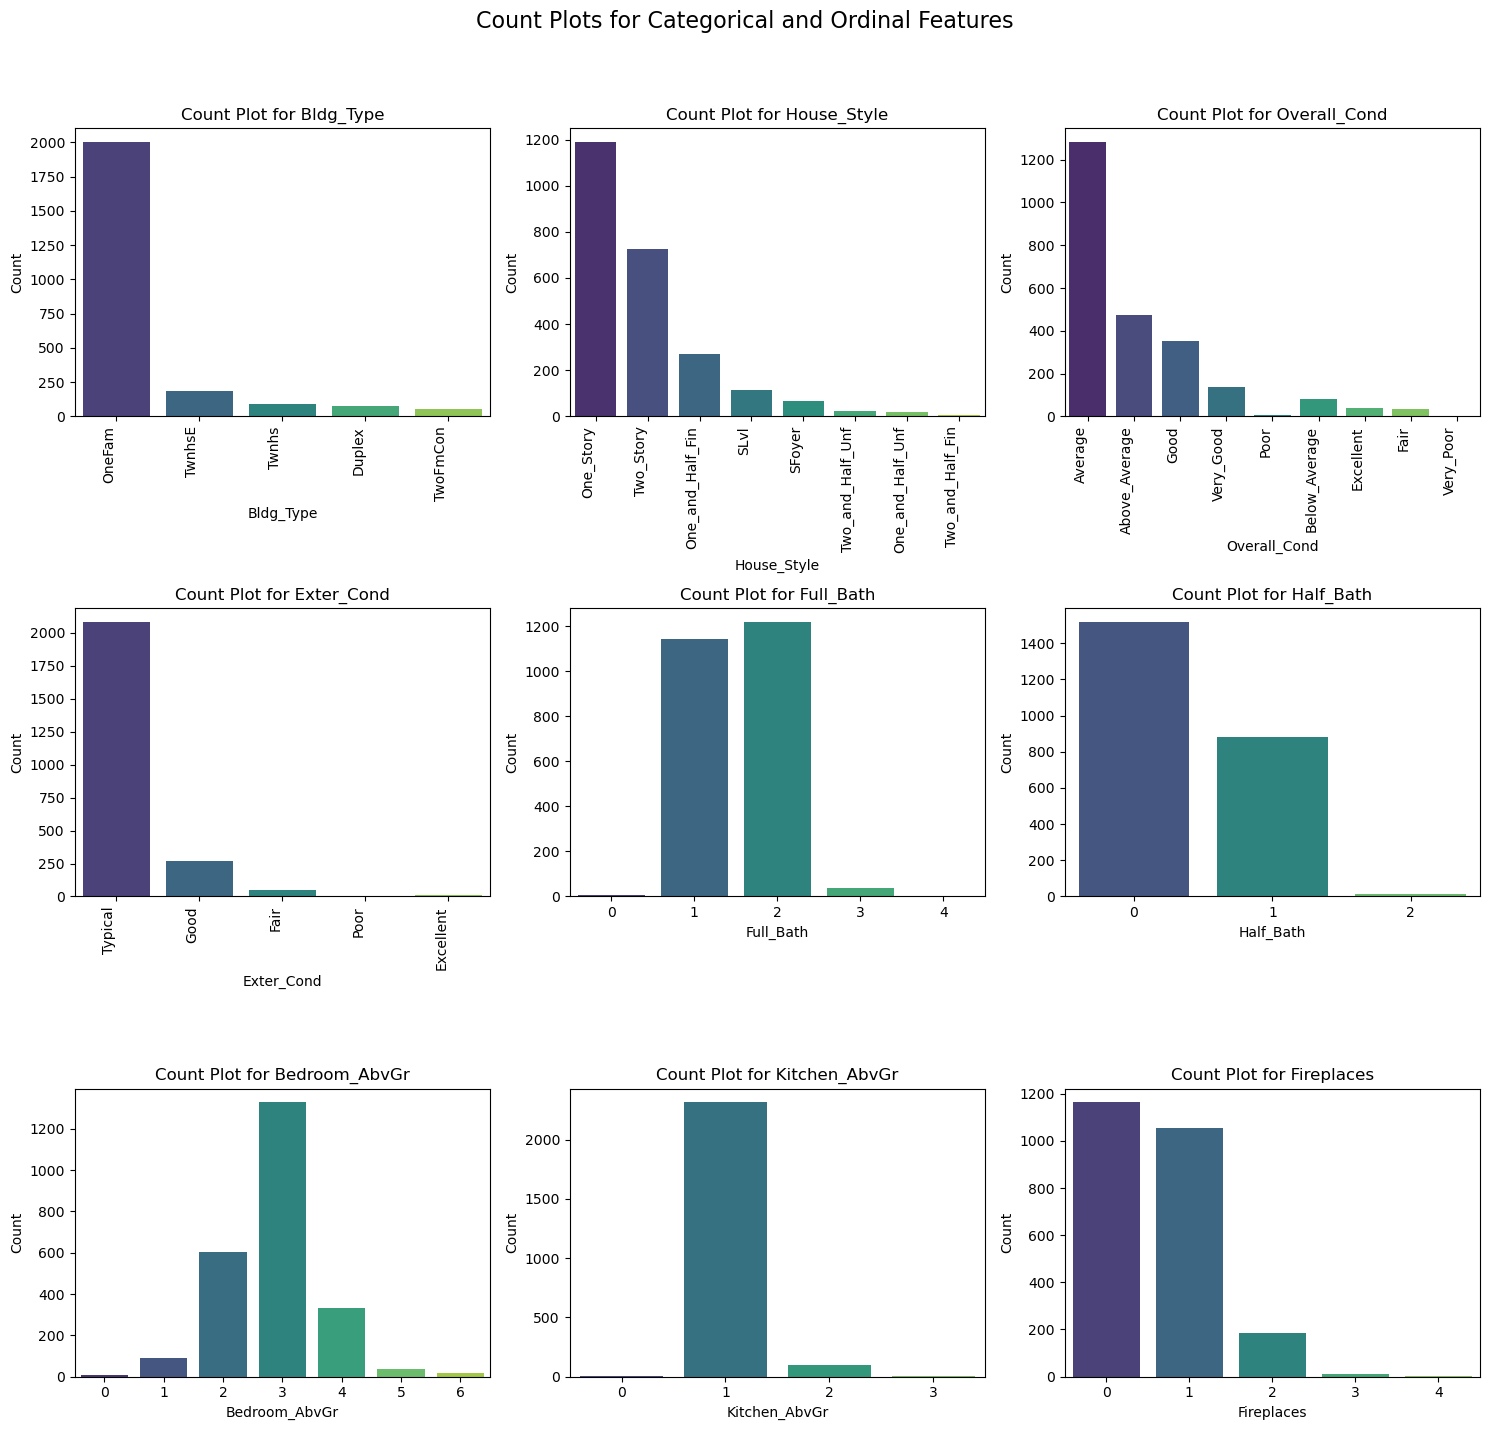

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = housing_data.select_dtypes(include=['object']).columns
additional_ordinal_features = ['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces']

# Combine categorical and additional numeric features
features_to_plot = list(categorical_features) + additional_ordinal_features

# Set up a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Count Plots for Categorical and Ordinal Features', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the features and create count plots
for i, feature in enumerate(features_to_plot):
    sns.countplot(x=feature, data=housing_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    if(feature in categorical_features):
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure1_count_plots.jpg')
# Show the plots
plt.show()


## Plotting heat map for all the features to check the correlation with respect to each other

C:\Users\User\AppData\Local\Temp\ipykernel_19052\3193579341.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_data.corr())


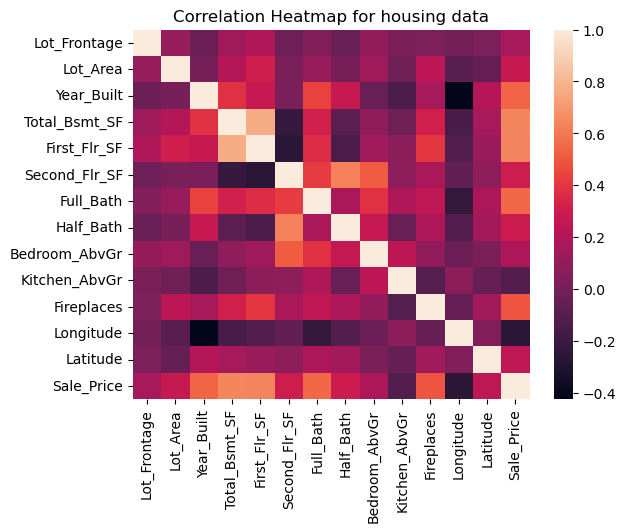

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.heatmap(housing_data.corr())
plt.title('Correlation Heatmap for housing data')
plt.show()

## Ploting heatmap for only numerical valued features 

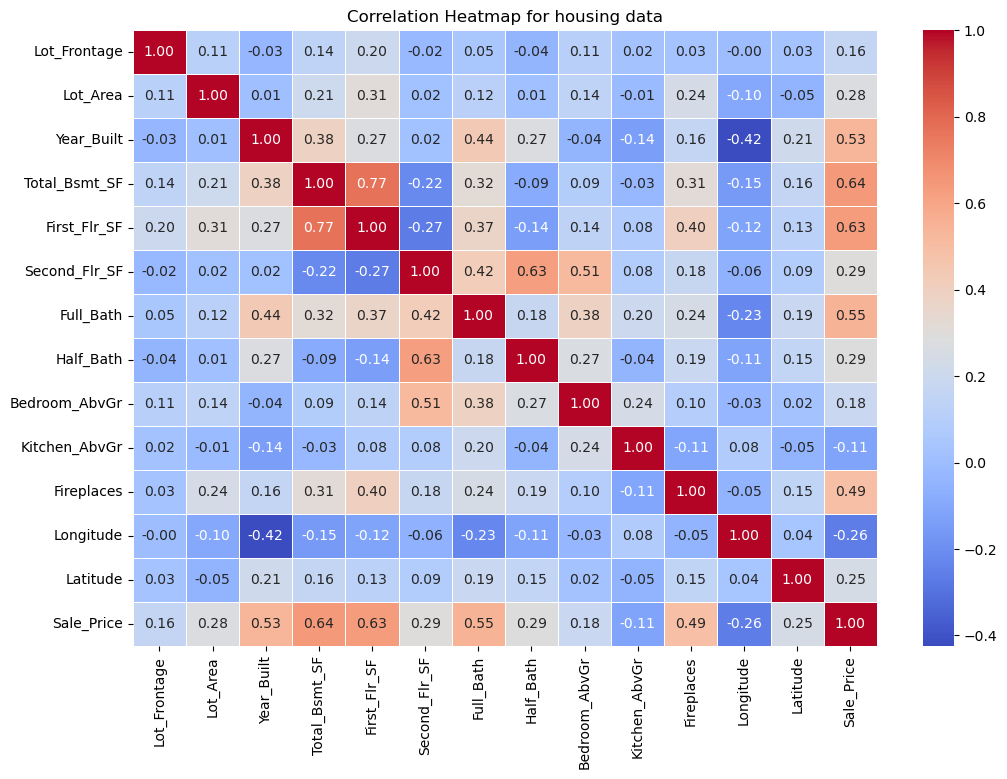

In [8]:
numeric_features_hd = housing_data.select_dtypes(include=[np.number])
#numeric_features_hd.dtypes
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features_hd.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for housing data')
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure2_numerical_features_correlation.jpg')
plt.show()

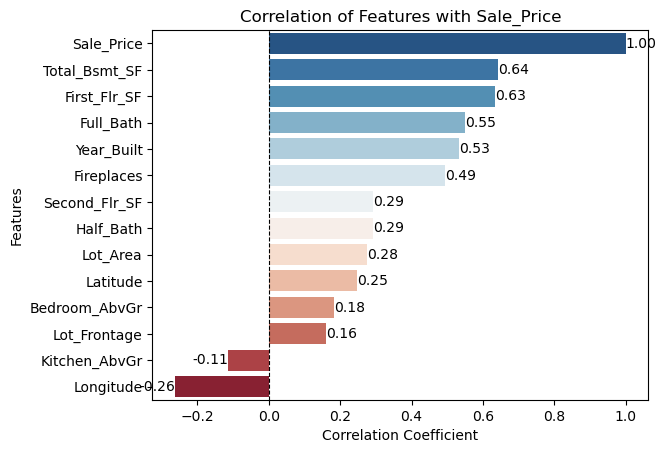

In [9]:
correlation_matrix = numeric_features_hd.corr()

sorted_corr = correlation_matrix['Sale_Price'].sort_values(ascending=False)

sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='RdBu_r')

# Set the title and labels
plt.title('Correlation of Features with Sale_Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

# Create a diverging bar plot
bar_plot = sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='RdBu_r')

# Annotate bars with correlation coefficients
for i, value in enumerate(sorted_corr.values):
    bar_plot.text(value, i, f'{value:.2f}', ha='left' if value > 0 else 'right', va='center')

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure3_numfeat_sale_price_correlation.jpg')

# Show the bar plot
plt.show()

## Plotting skew map to check the distribution of target variable

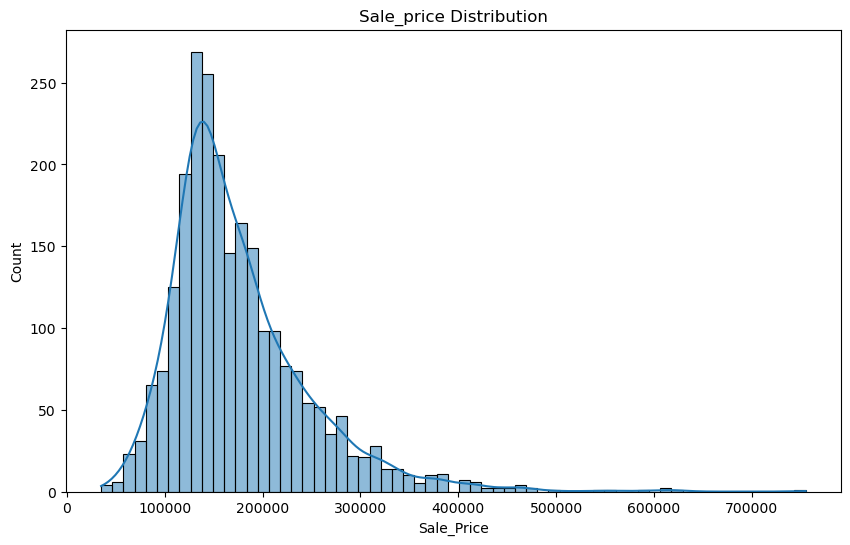

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Sale_Price', data=housing_data, common_norm=False,kde=True)
plt.title('Sale_price Distribution')
plt.show()

## Getting value of skewness for target variable

In [11]:
from scipy.stats import skew

# Assuming data is a NumPy array or a list
skewness = skew(housing_data['Sale_Price'])
print(f"Skewness: {skewness}")

Skewness: 1.7442728887821093


## Checking the distribution of data with respect to sale_price using scatter plot for all features

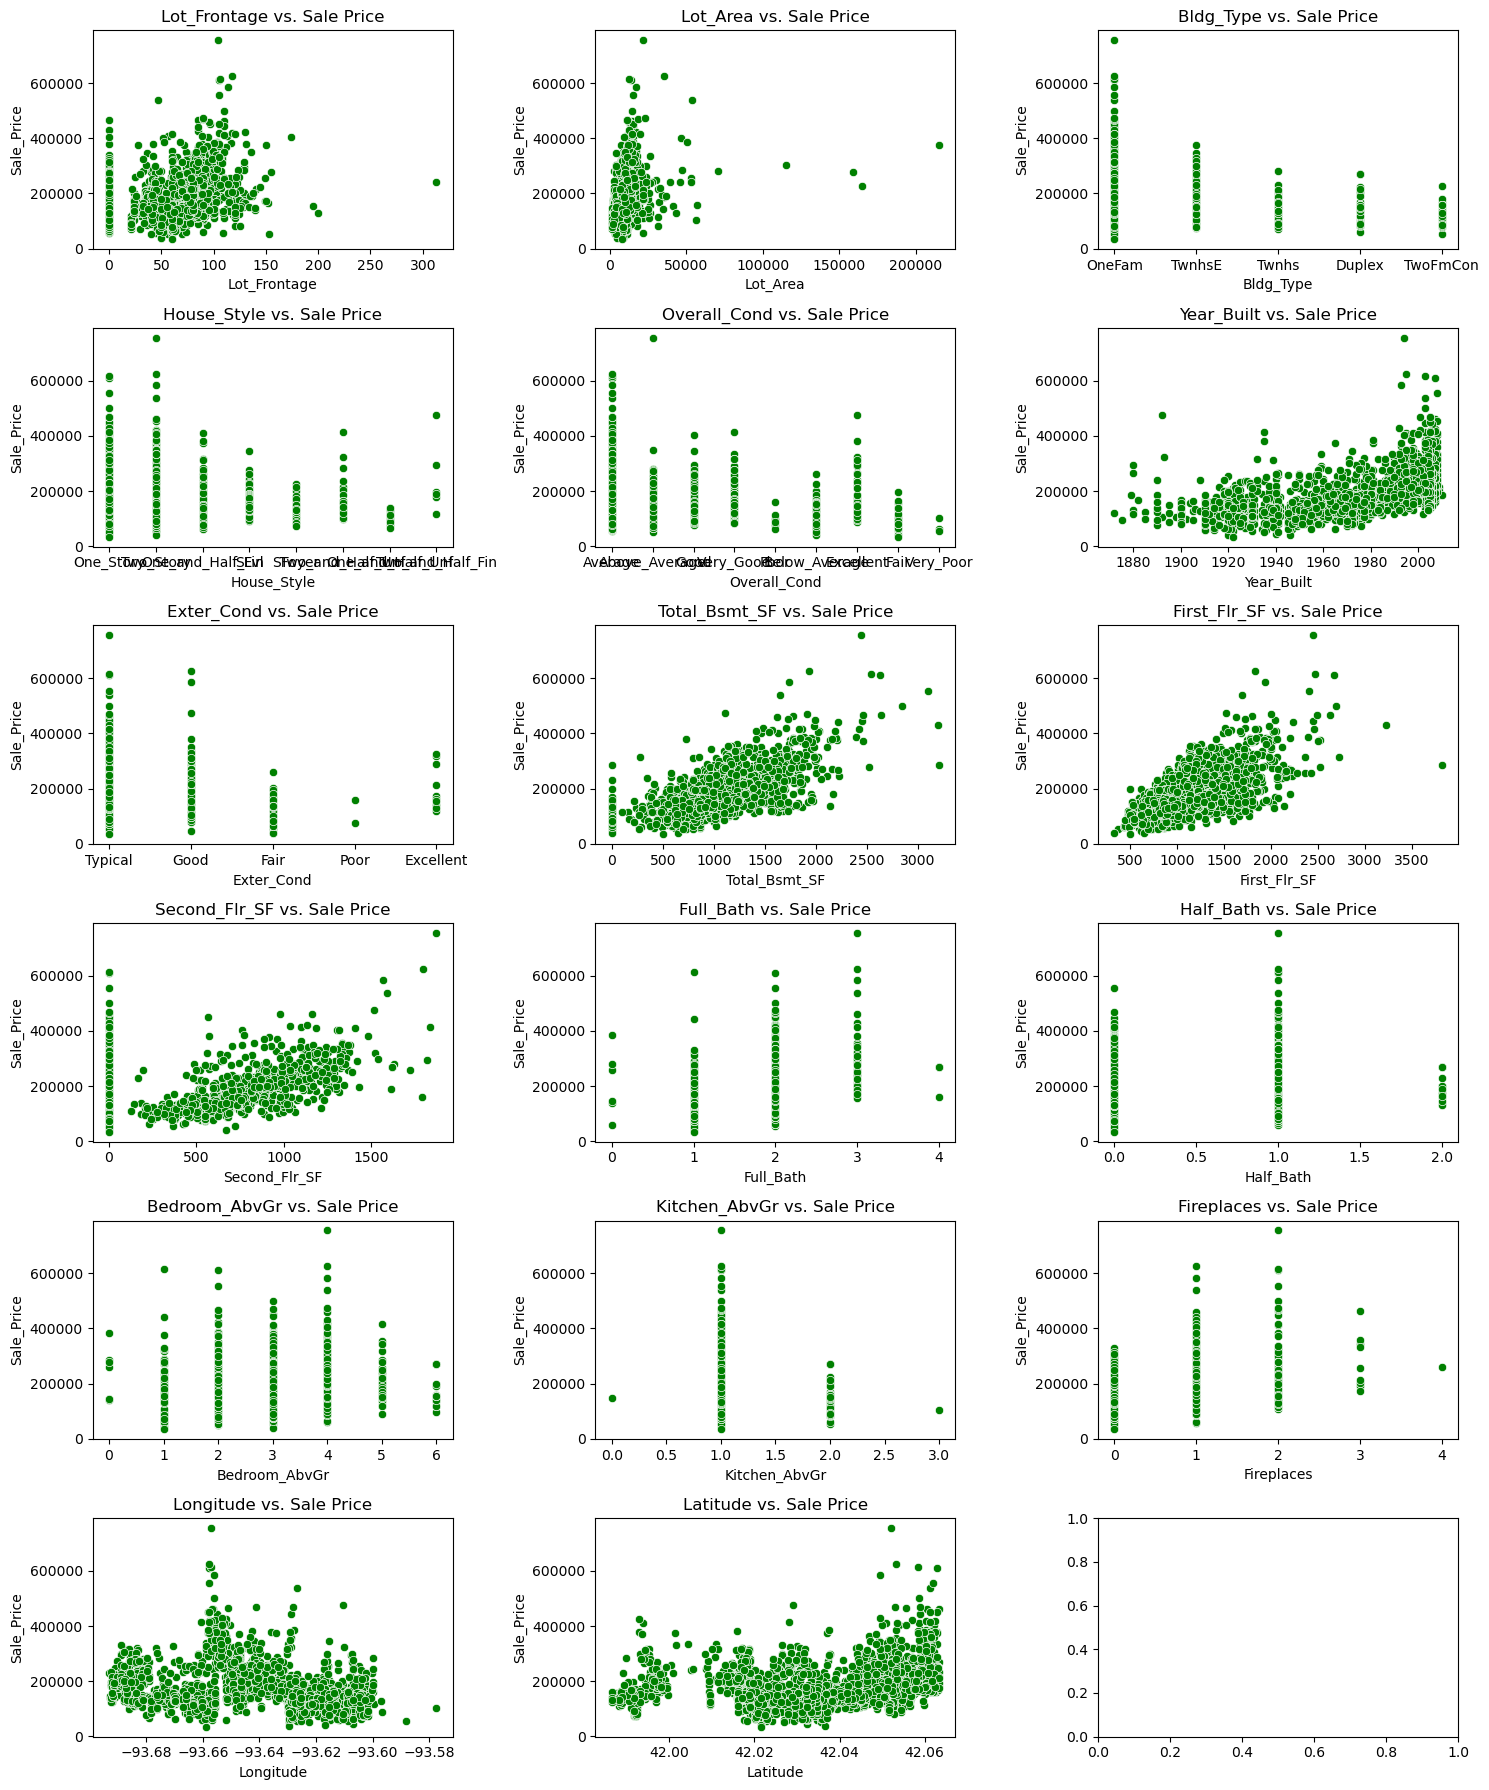

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'housing_data' is your DataFrame

# Get all features
features = housing_data.drop('Sale_Price', axis=1).columns

# Set up subplots
num_rows = 6  # Adjust the number of rows based on your requirement
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 18))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Loop through each feature and plot a scatter plot
for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=feature, y='Sale_Price', data=housing_data, ax=ax, color='GREEN')
    ax.set_title(f'{feature} vs. Sale Price')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Display all plots
plt.show()

## Checking the distribution of data with respect to sale_price using scatter plot for all numericall features and box plot for categorical features

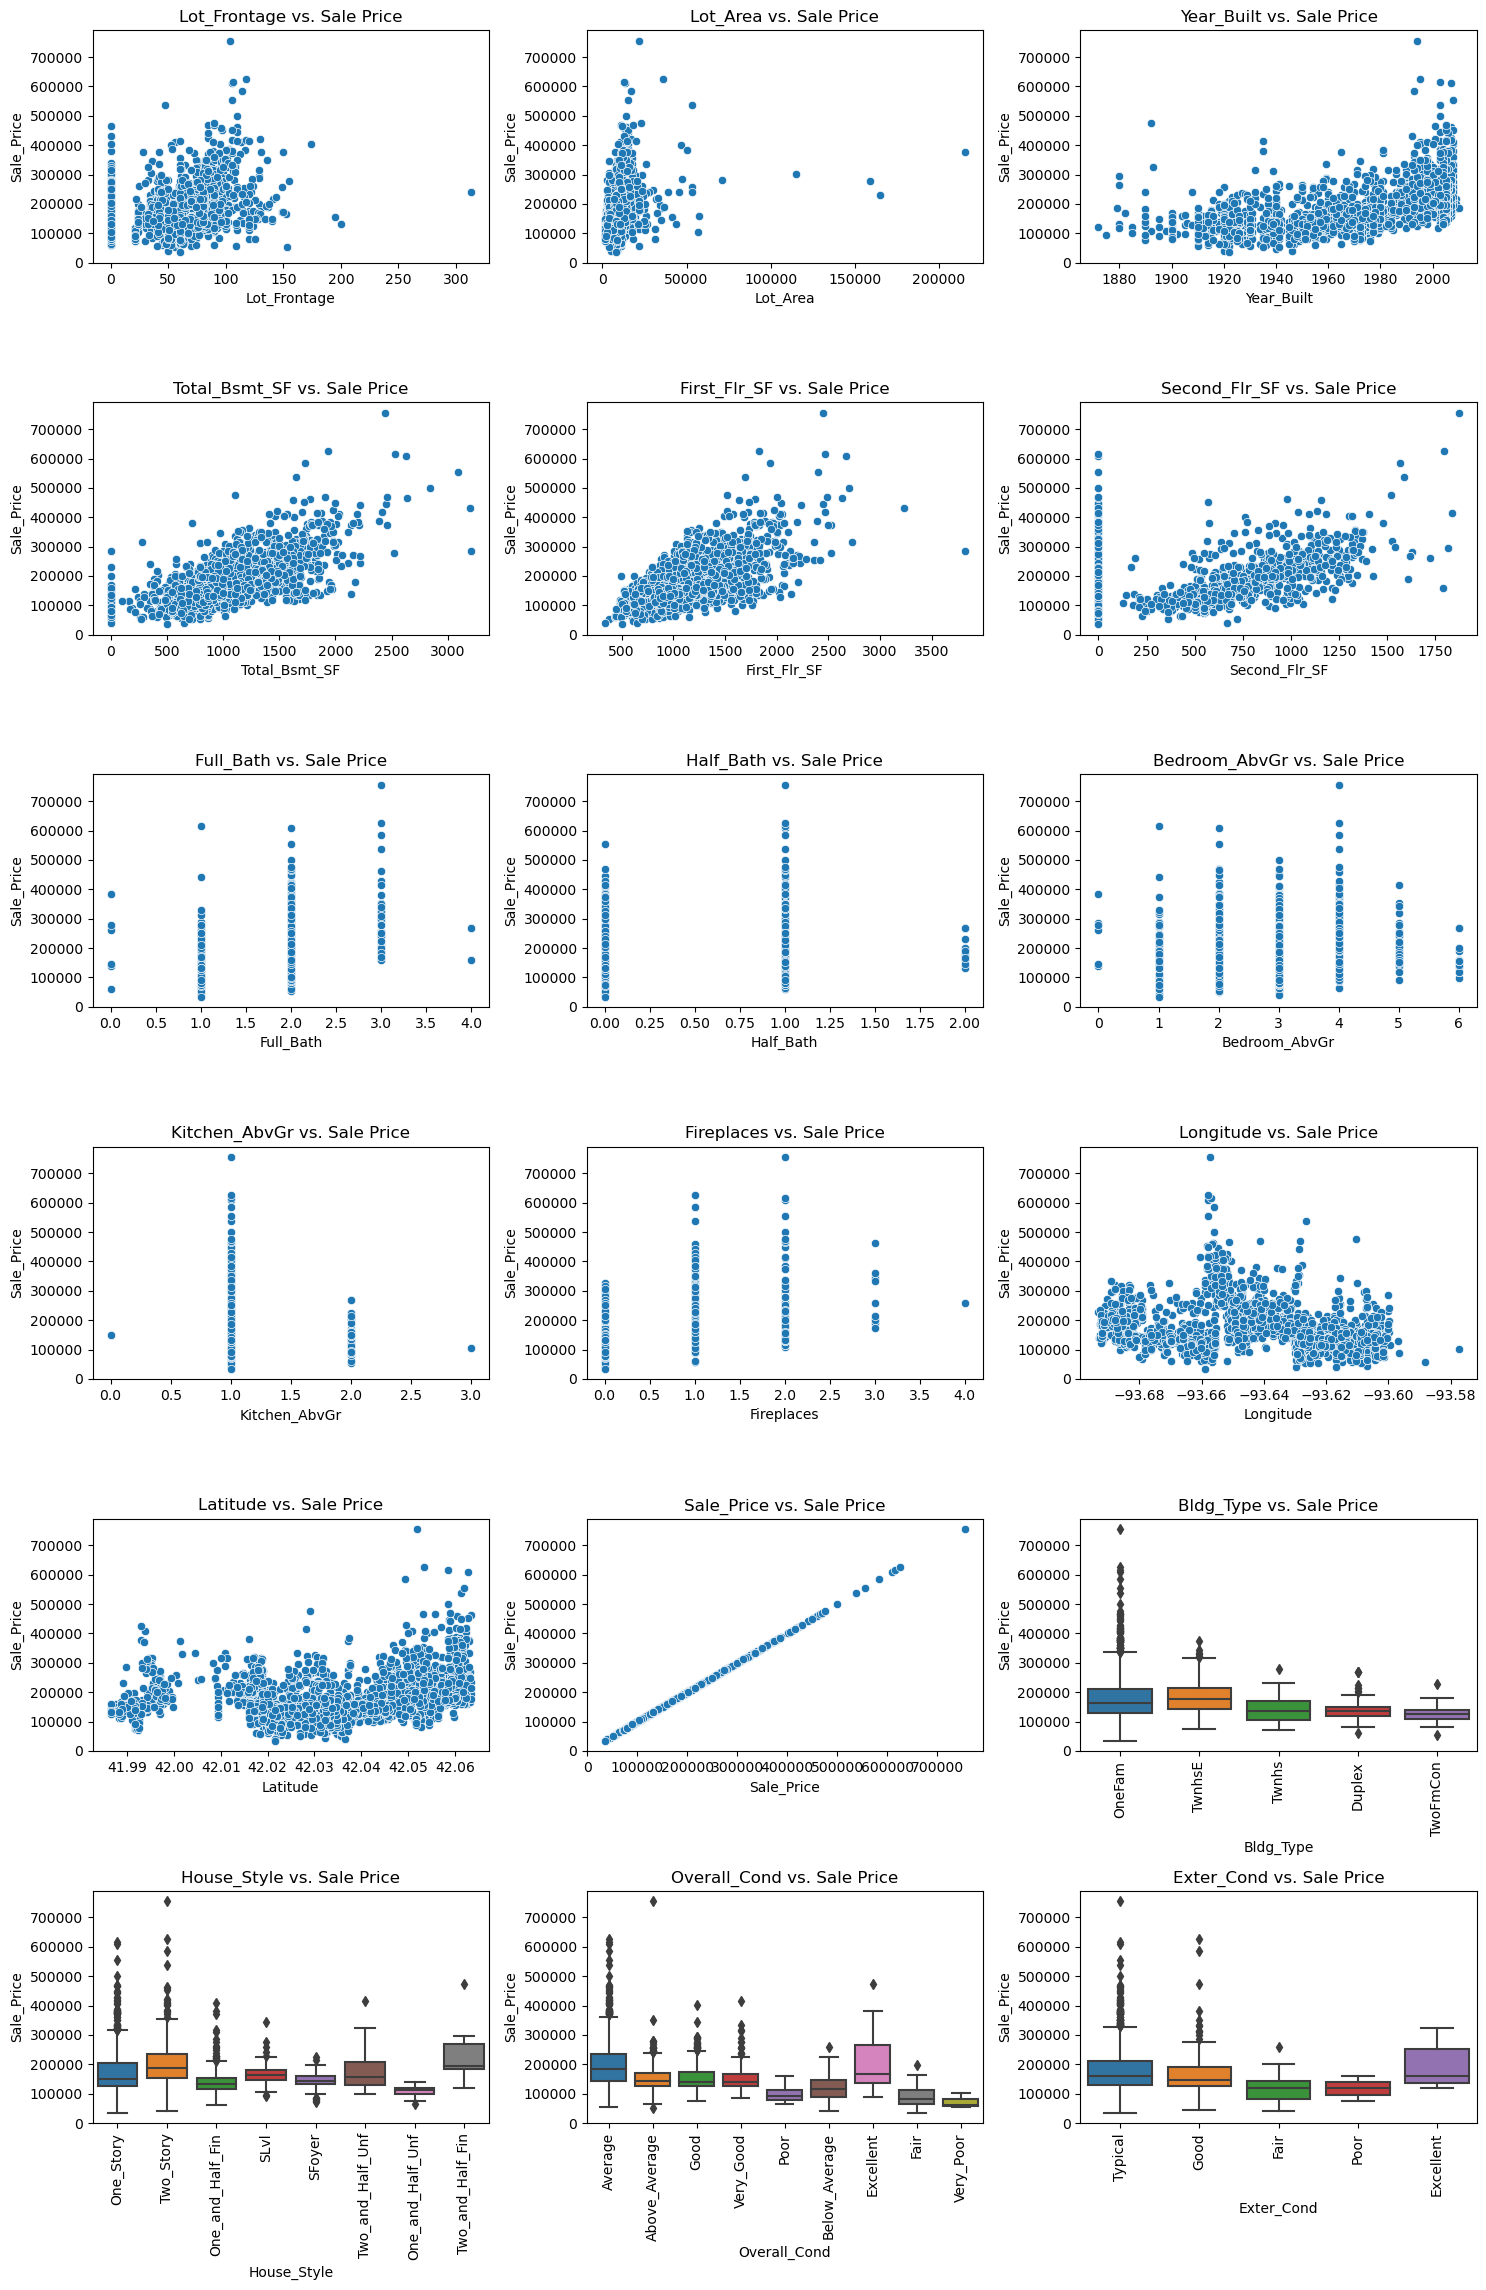

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'housing_data' is your DataFrame

# Get all features
numeric_features_hd = housing_data.select_dtypes(include=['number']).columns
categorical_features_hd = housing_data.select_dtypes(include=['object']).columns

# Set up subplots
num_rows = 6  # Adjust the number of rows based on your requirement
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 23))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Loop through each numerical feature and plot a scatter plot
for i, feature in enumerate(numeric_features_hd):
    sns.scatterplot(x=housing_data[feature], y=housing_data['Sale_Price'], ax=axes[i])
    axes[i].set_title(f'{feature} vs. Sale Price')

# Loop through each categorical feature and plot a boxplot
for i, feature in enumerate(categorical_features_hd):
    sns.boxplot(x=housing_data[feature], y=housing_data['Sale_Price'], ax=axes[i + len(numeric_features_hd)])
    axes[i + len(numeric_features_hd)].set_title(f'{feature} vs. Sale Price')
    axes[i + len(numeric_features_hd)].tick_params(axis='x', rotation=90)

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure4_data_distribution.jpg')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Display all plots
plt.show()

## Plotting histogram plot for all features to check how they are distributed

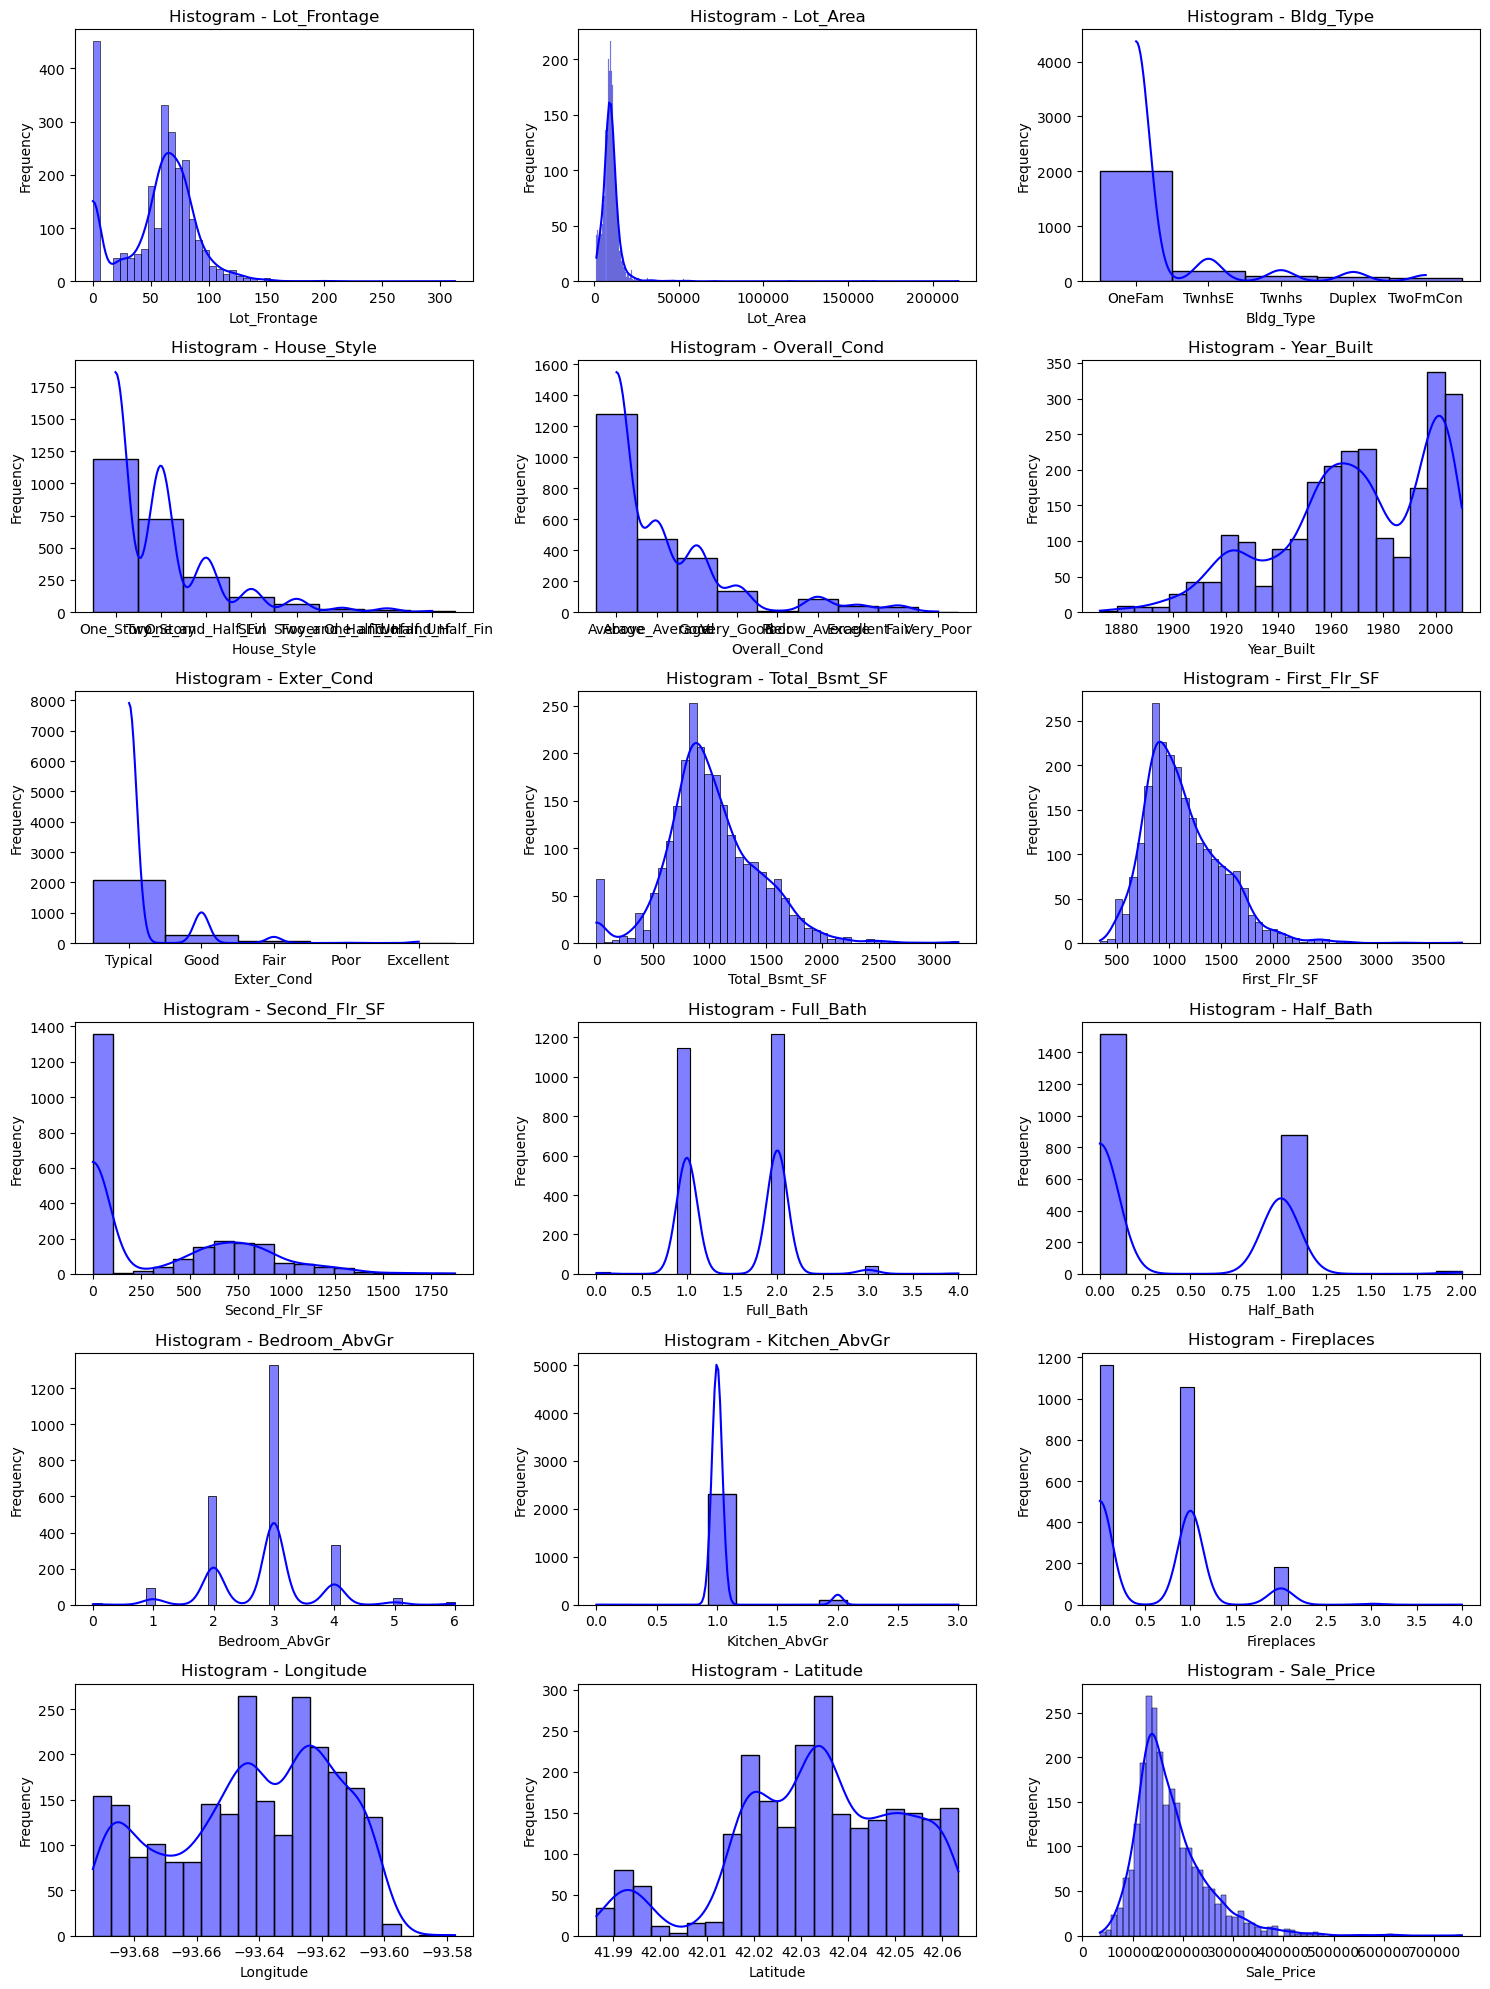

In [14]:

# Set up subplots
num_rows = 6  # Adjust the number of rows based on your requirement
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Set different colors for histogram and KDE
hist_color ='skyblue'
#element = {'color': 'skyblue', 'edgecolor': 'black'}
kde_color = 'black'

# Loop through each feature and plot a histogram
for i, feature in enumerate(housing_data.columns):
    ax = axes[i]
    sns.histplot(housing_data[feature], color='blue',kde=True, ax=ax, line_kws={'color': kde_color })
    ax.set_title(f'Histogram - {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure5_datasistribution_allfeat.jpg')
plt.show()

## Calculating the skewness value for numerical features

In [15]:
for i, column in enumerate(numeric_features_hd):  # Exclude the 'Sale_Price' column
    skewness = skew(housing_data[column])
    print(f"Skewness of {column}: {skewness}")

Skewness of Lot_Frontage: -0.08106402380836052
Skewness of Lot_Area: 13.385593081237493
Skewness of Year_Built: -0.5863593106167835
Skewness of Total_Bsmt_SF: 0.45610204308998054
Skewness of First_Flr_SF: 1.0426523952716684
Skewness of Second_Flr_SF: 0.8036178490279292
Skewness of Full_Bath: 0.24486055951409358
Skewness of Half_Bath: 0.663579563835415
Skewness of Bedroom_AbvGr: 0.18404423881937823
Skewness of Kitchen_AbvGr: 4.678663509737174
Skewness of Fireplaces: 0.7386159194662122
Skewness of Longitude: -0.33730287443398965
Skewness of Latitude: -0.5074624075041824
Skewness of Sale_Price: 1.7442728887821093


## Encoding the categorical values using label encoder so it is used to train the model

In [16]:
from sklearn.preprocessing import LabelEncoder

housing_data_x= housing_data.copy()
categorical_features_x = housing_data_x.select_dtypes(include=['object']).columns
numerical_features_x = housing_data_x.select_dtypes(include=[np.number]).columns

category_mappings ={}


# Label Encoding for selected categorical columns
label_encoder = LabelEncoder()


for col in categorical_features_x:
    housing_data_x[col] = label_encoder.fit_transform(housing_data_x[col])
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in category_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Bldg_Type: {'Duplex': 0, 'OneFam': 1, 'Twnhs': 2, 'TwnhsE': 3, 'TwoFmCon': 4}
Mapping for House_Style: {'One_Story': 0, 'One_and_Half_Fin': 1, 'One_and_Half_Unf': 2, 'SFoyer': 3, 'SLvl': 4, 'Two_Story': 5, 'Two_and_Half_Fin': 6, 'Two_and_Half_Unf': 7}
Mapping for Overall_Cond: {'Above_Average': 0, 'Average': 1, 'Below_Average': 2, 'Excellent': 3, 'Fair': 4, 'Good': 5, 'Poor': 6, 'Very_Good': 7, 'Very_Poor': 8}
Mapping for Exter_Cond: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Typical': 4}


## Calculating the skewness for categorical features

In [17]:
  for i, column in enumerate(categorical_features_hd):  # Exclude the 'Sale_Price' column
    skewness = skew(housing_data_x[column])
    print(f"Skewness of {column}: {skewness}")

Skewness of Bldg_Type: 2.2146394389079402
Skewness of House_Style: 0.49833458566274436
Skewness of Overall_Cond: 1.308215234166622
Skewness of Exter_Cond: -2.405388949842232


## Plotting hetmap to calculate correlation of all features after transforming the categorical data

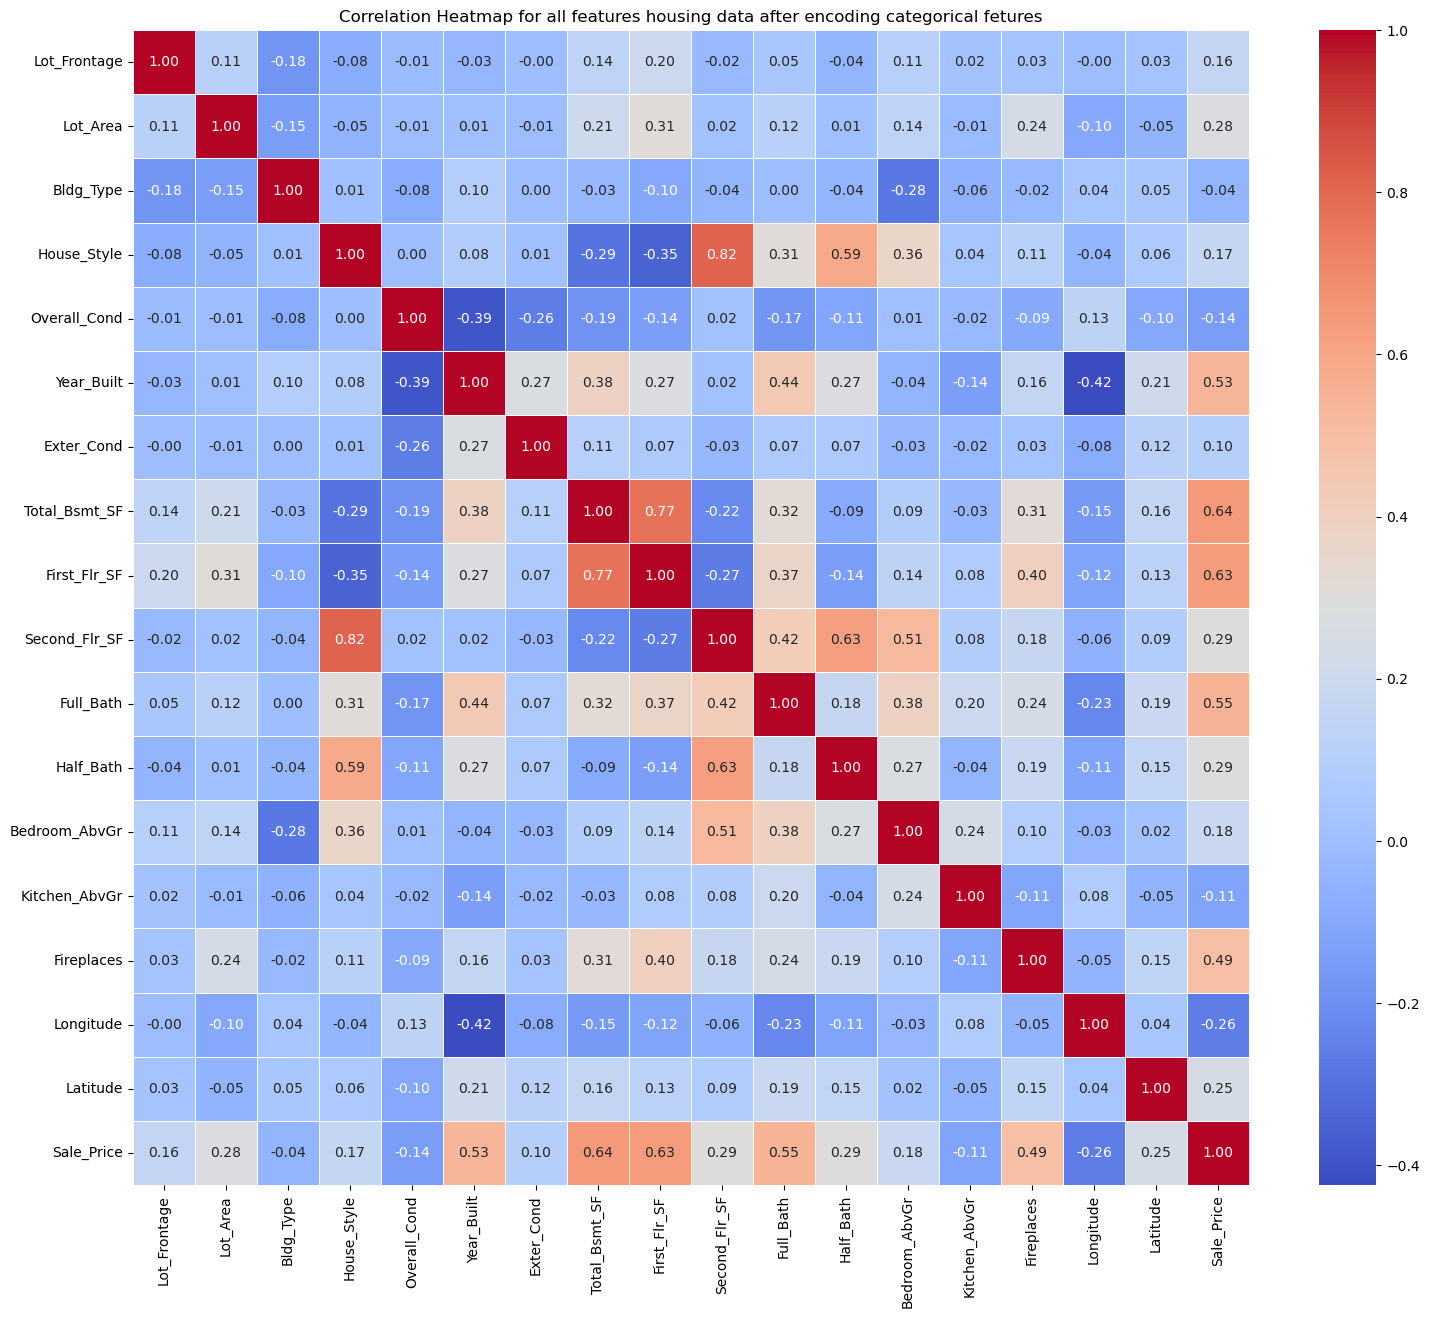

In [18]:
plt.figure(figsize=(18,15))
sns.heatmap(housing_data_x.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for all features housing data after encoding categorical fetures')
plt.show()

## Calculating correlation of all features with respect to sales price

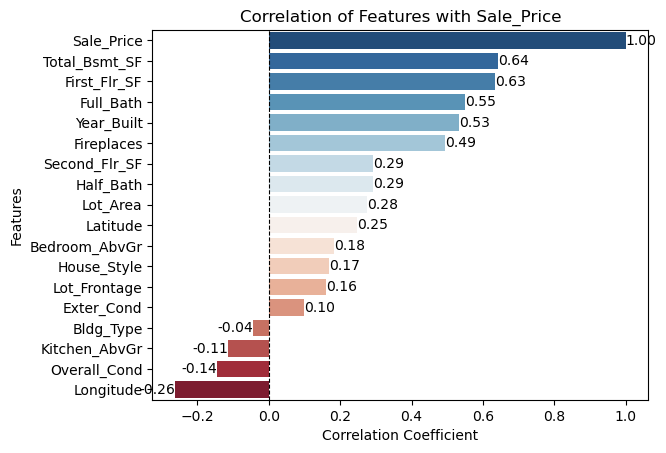

In [19]:
correlation_matrix = housing_data_x.corr()

sorted_corr = correlation_matrix['Sale_Price'].sort_values(ascending=False)

sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='RdBu_r')

# Set the title and labels
plt.title('Correlation of Features with Sale_Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

# Create a diverging bar plot
bar_plot = sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='RdBu_r')

# Annotate bars with correlation coefficients
for i, value in enumerate(sorted_corr.values):
    bar_plot.text(value, i, f'{value:.2f}', ha='left' if value > 0 else 'right', va='center')

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure6_features_sale_price_correlation.jpg')

# Show the bar plot
plt.show()

In [20]:
corr = housing_data_x.corr()
print (corr['Sale_Price'].sort_values(ascending=False))

Sale_Price       1.000000
Total_Bsmt_SF    0.642354
First_Flr_SF     0.634672
Full_Bath        0.548635
Year_Built       0.533158
Fireplaces       0.493381
Second_Flr_SF    0.293338
Half_Bath        0.292314
Lot_Area         0.275066
Latitude         0.246785
Bedroom_AbvGr    0.183634
House_Style      0.170179
Lot_Frontage     0.160398
Exter_Cond       0.099385
Bldg_Type       -0.044146
Kitchen_AbvGr   -0.114394
Overall_Cond    -0.143395
Longitude       -0.262492
Name: Sale_Price, dtype: float64


## Descriptive stastics on data 

In [21]:
housing_data_x.describe()


Lot_Frontage       Lot_Area    Bldg_Type  House_Style  Overall_Cond  \
count   2413.000000    2413.000000  2413.000000  2413.000000   2413.000000   
mean      55.462495   10060.208040     1.226689     1.983423      1.864898   
std       33.542416    8222.759854     0.724769     2.297462      2.052782   
min        0.000000    1300.000000     0.000000     0.000000      0.000000   
25%       37.000000    7390.000000     1.000000     0.000000      1.000000   
50%       60.000000    9360.000000     1.000000     1.000000      1.000000   
75%       77.000000   11404.000000     1.000000     5.000000      2.000000   
max      313.000000  215245.000000     4.000000     7.000000      8.000000   

        Year_Built   Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
count  2413.000000  2413.000000    2413.000000   2413.000000    2413.000000   
mean   1969.436386     3.694571    1022.827600   1133.857024     339.242851   
std      29.487943     0.786995     408.977848    366.442470     423.198488   
min    1872.000000     0.000000       0.000000    334.000000       0.000000   
25%    1953.000000     4.000000     784.000000    866.000000       0.000000   
50%    1971.000000     4.000000     970.000000   1060.000000       0.000000   
75%    1998.000000     4.000000    1246.000000   1350.000000     704.000000   
max    2010.000000     4.000000    3206.000000   3820.000000    1872.000000   

         Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr   Fireplaces  \
count  2413.000000  2413.000000    2413.000000    2413.000000  2413.000000   
mean      1.539163     0.377953       2.854538       1.040199     0.602984   
std       0.544667     0.498467       0.813430       0.200642     0.648911   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000     0.000000       2.000000       1.000000     0.000000   
50%       2.000000     0.000000       3.000000       1.000000     1.000000   
75%       2.000000     1.000000       3.000000       1.000000     1.000000   
max       4.000000     2.000000       6.000000       3.000000     4.000000   

         Longitude     Latitude     Sale_Price  
count  2413.000000  2413.000000    2413.000000  
mean    -93.642391    42.033730  175567.643183  
std       0.026159     0.018015   70979.614441  
min     -93.693153    41.986498   35000.000000  
25%     -93.661562    42.021547  129500.000000  
50%     -93.640326    42.034569  159000.000000  
75%     -93.621485    42.047997  206900.000000  
max     -93.577427    42.063381  755000.000000

## Pair Plot just to see distribution of data with respect to each other(not recommended) 

## Function to traing the model for given independent features and dependent feature

In [22]:
import statsmodels.api as sm
def train_ols_model(df_x,df_y):
    r_seed = "22224122"
    seed = int(''.join(filter(str.isdigit,r_seed)))

    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=seed)
    print("length of Train data", len(x_train))
    print("length of Test data",len(x_test))

    #model_log = sm.OLS(y_train_log, sm.add_constant(x_train_log)).fit()
    model = sm.OLS(y_train,sm.add_constant(x_train)).fit()# Add a constant for the intercept term
    return model,x_train,x_test,y_train,y_test

## Function to predict the value for test data after the model is trained parameters to be passed are model and test_data

In [23]:
def predicting_value(model,x_test):
    y_predict=model.predict(sm.add_constant(x_test))
    print("Predicting y completed")
    return y_predict

## Function to evaluate the model by calculating mean_squared_error, r-square, mean absolute error. Parameters to be passed are test_data and predicted_data

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_mse_mae(y_test,y_predict):
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")

## Function to remove the features which has p values greater than 0.05. Parmeters to be passed model using which we calculate p-value and the dataframe for which we need to test and remove features

In [25]:
def removing_pgt5(model,data_frame):    
    p_values = model.pvalues[1:]

    # Remove features with p-values greater than 0.05
    selected_features = p_values[p_values > 0.05].index
    housing_data_filtered = data_frame.drop(selected_features, axis=1)

    # Add the constant term back to the selected features
    selected_features = ['const'] + list(selected_features)

    # Display the DataFrame with selected features
    print("Original DataFrame shape:", data_frame.shape)
    #selected_features
    print("DataFrame shape after feature selection:", housing_data_filtered.shape)
    return housing_data_filtered

## Function to calculate the VIF. Parmeter to be passed is dataframe for which VIF to be calculated

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def calculate_vif(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    # Sort VIF data in descending order based on VIF values
    vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

    # Display the sorted VIF data
    print("VIF Data in Descending Order:")
    print(vif_data_sorted)

## Function to export model summary to pdf in table format

In [27]:
from matplotlib.backends.backend_pdf import PdfPages
def export_summary_pdf(model_name,model):
    # Get the summary
    summary = model.summary()

    # Convert the summary to a DataFrame
    table_data = [list(map(str, row)) for row in summary.tables[1].data[1:]]  # Convert to strings
    headers = summary.tables[1].data[0]

    df_summary = pd.DataFrame(table_data, columns=headers)

    # Save the DataFrame to a PDF file
    pdf_file_path = f'E:\\NCI\\Statistics for Data Analytics\\{model_name}_summary.pdf'

    # Create a PdfPages object
    with PdfPages(pdf_file_path) as pdf:
        # Create a figure
        fig, ax = plt.subplots(figsize=(8, 6))

        # Remove axis
        ax.axis('off')

        # Create a table from the DataFrame and add it to the figure
        ax.table(cellText=df_summary.values,
                 colLabels=df_summary.columns,
                 cellLoc = 'center', 
                 loc='center')

        # Save the figure to the PdfPages
        pdf.savefig()
        plt.close()

    # Print a message indicating where the PDF file is saved
    print(f"Model summary has been saved to {pdf_file_path}")

# Training the model after encoding the categorical data using label encoder

In [28]:
import tabulate
from pytablewriter import MarkdownTableWriter
import pdfkit

independent_features1 = housing_data_x.drop('Sale_Price', axis=1) 
dependent_features1 = housing_data_x['Sale_Price']
print("Training the model\n")
model1,x_train1,x_test1,y_train1,y_test1 = train_ols_model(independent_features1,dependent_features1)
print(model1.summary())

summary = model1.summary()


Training the model

length of Train data 1809
length of Test data 604
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     488.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:46:19   Log-Likelihood:                -21189.
No. Observations:                1809   AIC:                         4.241e+04
Df Residuals:                    1791   BIC:                         4.251e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [29]:
export_summary_pdf('model_one',model1)

Model summary has been saved to E:\NCI\Statistics for Data Analytics\model_one_summary.pdf


## Predicting Y for trained data

In [30]:
print("Predicting y")
y_predict1 = predicting_value(model1,x_test1)

Predicting y
Predicting y completed


## Evaluating trained model

In [31]:
print("Calculating mae,mse")
calculate_mse_mae(y_test1,y_predict1)

Calculating mae,mse
Mean Squared Error: 869059497.6025758
R-squared: 0.8379090793353802
Mean Absolute Error: 20495.726954279242


## Calculating VIF for the above model

In [32]:
print("\n\nCalculating multicollinearity with VIF")
calculate_vif(housing_data_x.drop('Sale_Price', axis=1))



Calculating multicollinearity with VIF
VIF Data in Descending Order:
         Variable       VIF
9   Second_Flr_SF  5.309648
8    First_Flr_SF  3.747843
3     House_Style  3.447336
7   Total_Bsmt_SF  2.730441
10      Full_Bath  2.561830
5      Year_Built  2.491767
11      Half_Bath  2.215438
12  Bedroom_AbvGr  1.800343
14     Fireplaces  1.456803
15      Longitude  1.287750
4    Overall_Cond  1.240932
13  Kitchen_AbvGr  1.203463
1        Lot_Area  1.180358
2       Bldg_Type  1.167856
16       Latitude  1.130605
6      Exter_Cond  1.125112
0    Lot_Frontage  1.086177


## Anova test for categorical data

In [33]:
from statsmodels.formula.api import ols
 
# 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond' are your categorical variables

for variable in categorical_features_hd:
    formula = f'Sale_Price ~ {variable}'
    model_cat = ols(formula, data=housing_data_x).fit()
    anova_table = sm.stats.anova_lm(model_cat, typ=2)
    print(f"\nANOVA for {variable}:")
    print(anova_table)


ANOVA for Bldg_Type:
                 sum_sq      df         F   PR(>F)
Bldg_Type  2.368302e+10     1.0  4.708005  0.03012
Residual   1.212823e+13  2411.0       NaN      NaN

ANOVA for House_Style:
                   sum_sq      df          F        PR(>F)
House_Style  3.519321e+11     1.0  71.907609  3.871095e-17
Residual     1.179998e+13  2411.0        NaN           NaN

ANOVA for Overall_Cond:
                    sum_sq      df          F        PR(>F)
Overall_Cond  2.498699e+11     1.0  50.616217  1.474644e-12
Residual      1.190204e+13  2411.0        NaN           NaN

ANOVA for Exter_Cond:
                  sum_sq      df          F    PR(>F)
Exter_Cond  1.200301e+11     1.0  24.052151  0.000001
Residual    1.203188e+13  2411.0        NaN       NaN


## Function to visually assess how well the model predictions align with the actual observed values

In [34]:
def actual_predicted_plot(name,y_test, y_predict):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel("Actual Sales Price")
    plt.ylabel("Predicted Sales Price")
    plt.title("Actual vs. Predicted Sales Price")
    #plt.savefig(f'E:\\NCI\\Statistics for Data Analytics\\{name}.pdf')
    plt.show()


## Function to visually assess residuals

In [35]:
def residual_plot(name,y_test, y_predict):
    residuals = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residuals, lowess=False, color="skyblue",scatter_kws={"color": "green"})
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    #plt.savefig(f'E:\\NCI\\Statistics for Data Analytics\\{name}.pdf')
    plt.show()
    return residuals
#to check Homoscedasticity

## Function to visually assess probablity plot

In [36]:
# pp Plot
import scipy.stats as stats
def qq_plot(name,residual):
    plt.figure(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Probability-Probability (PP) Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    #plt.savefig(f'E:\\NCI\\Statistics for Data Analytics\\{name}.pdf')
    plt.show()

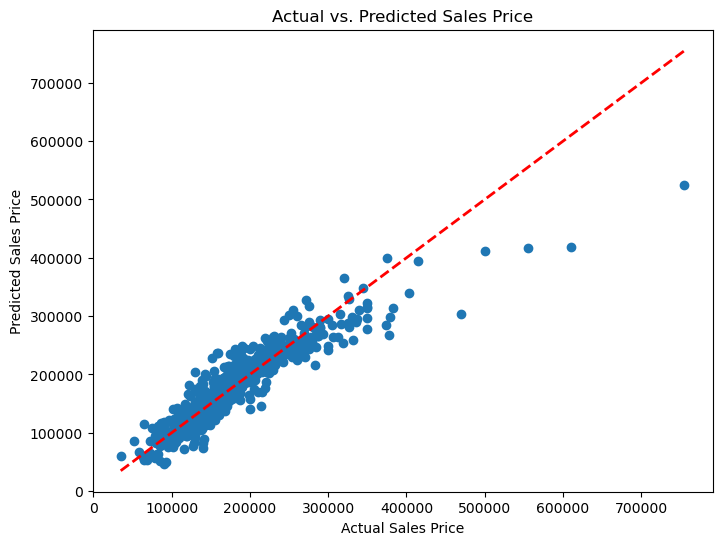

In [37]:
actual_predicted_plot('Predicted versus actual',y_test1, y_predict1)

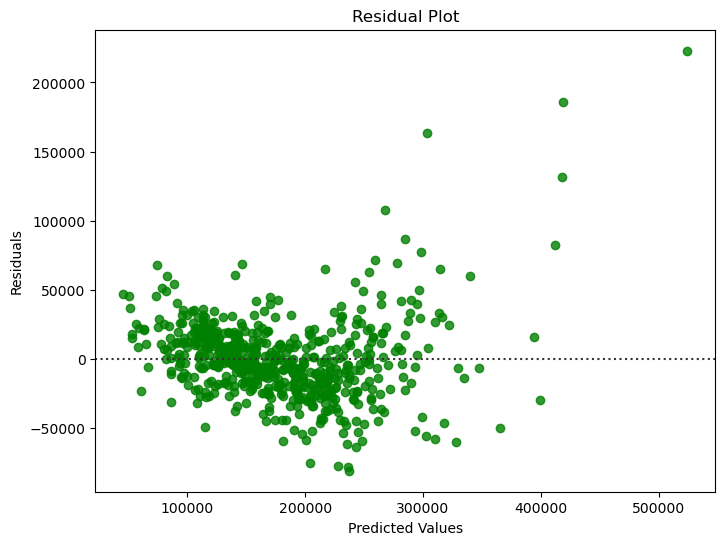

In [38]:
residual=residual_plot("Homoscedasticity for model1",y_test1, y_predict1)

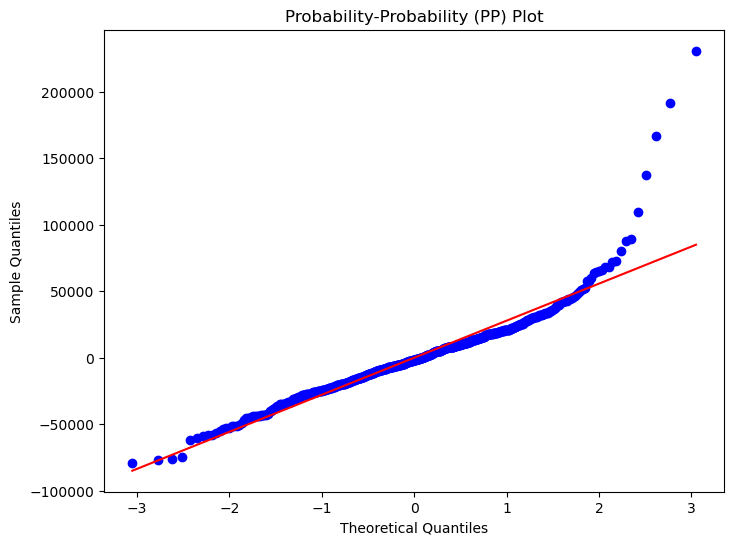

In [39]:
qq_plot("PP-Plot for model1",residual)

## Peroforming log tranformation on numrical data which are not nominal

In [40]:
from scipy.stats import boxcox

df_log = housing_data_x.copy()

features_to_exclude = list(categorical_features_hd) + ['Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']


skewed_features_pos = df_log.drop(columns=features_to_exclude).apply(lambda x: x.skew()).where(lambda x: x > 0).dropna().index
#skewed_features_neg = df_log.drop(columns=features_to_exclude).apply(lambda x: x.skew()).where(lambda x: x < 0).dropna().index

df_log.loc[:, skewed_features_pos] = df_log[skewed_features_pos].apply(lambda x: np.log1p(x))
#df_log.loc[:, skewed_features_neg] = df_log[skewed_features_neg].apply(lambda x: np.cbrt(x))

for i, column in enumerate(df_log.columns):  # Exclude the 'Sale_Price' column
    skewness = skew(df_log[column])
    print(f"Skewness of {column}: {skewness}")

Skewness of Lot_Frontage: -0.08106402380836052
Skewness of Lot_Area: -0.5128604571082565
Skewness of Bldg_Type: 2.2146394389079402
Skewness of House_Style: 0.49833458566274436
Skewness of Overall_Cond: 1.308215234166622
Skewness of Year_Built: -0.5863593106167835
Skewness of Exter_Cond: -2.405388949842232
Skewness of Total_Bsmt_SF: -4.94548498264387
Skewness of First_Flr_SF: 0.02458490814713158
Skewness of Second_Flr_SF: 0.2688985850010641
Skewness of Full_Bath: 0.24486055951409358
Skewness of Half_Bath: 0.663579563835415
Skewness of Bedroom_AbvGr: 0.18404423881937823
Skewness of Kitchen_AbvGr: 4.678663509737174
Skewness of Fireplaces: 0.7386159194662122
Skewness of Longitude: -0.33730287443398965
Skewness of Latitude: -0.5074624075041824
Skewness of Sale_Price: 0.15576229285273233


## Visualizng distribution of data after normalization applying transformation

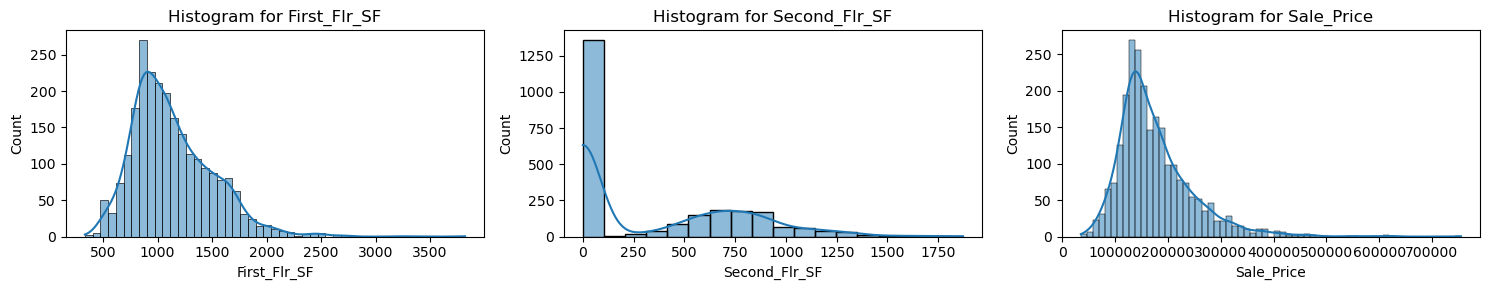

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


# List of features to plot
log_features = ['First_Flr_SF', 'Second_Flr_SF', 'Sale_Price']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Plot histograms with KDE for each feature
for i, feature in enumerate(log_features):
    sns.histplot(housing_data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {feature}')

# Adjust layout
plt.tight_layout()

#plt.savefig(f'E:\\NCI\\Statistics for Data Analytics\\Skewness_Before_log_transformation.pdf')

# Show the plot
plt.show()

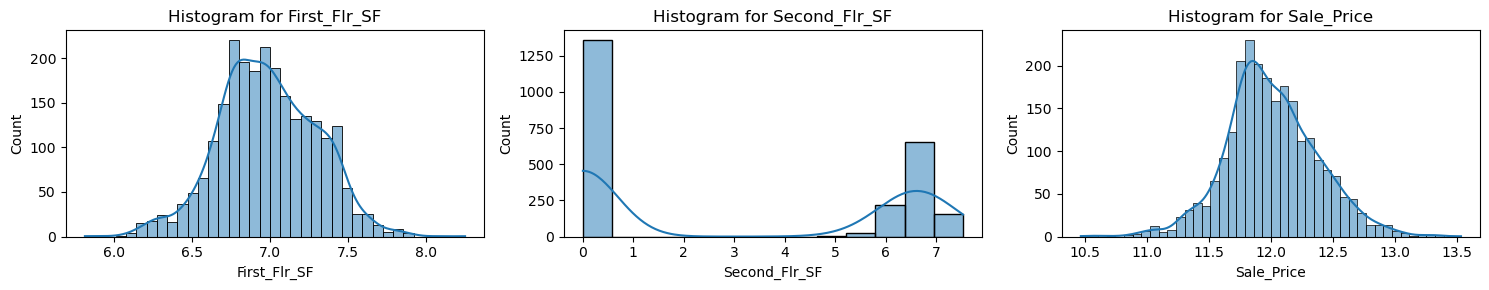

In [42]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Plot histograms with KDE for each feature
for i, feature in enumerate(log_features):
    sns.histplot(df_log[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {feature}')

# Adjust layout
plt.tight_layout()

#plt.savefig(f'E:\\NCI\\Statistics for Data Analytics\\Skewness_after_log_transformation.pdf')

# Show the plot
plt.show()

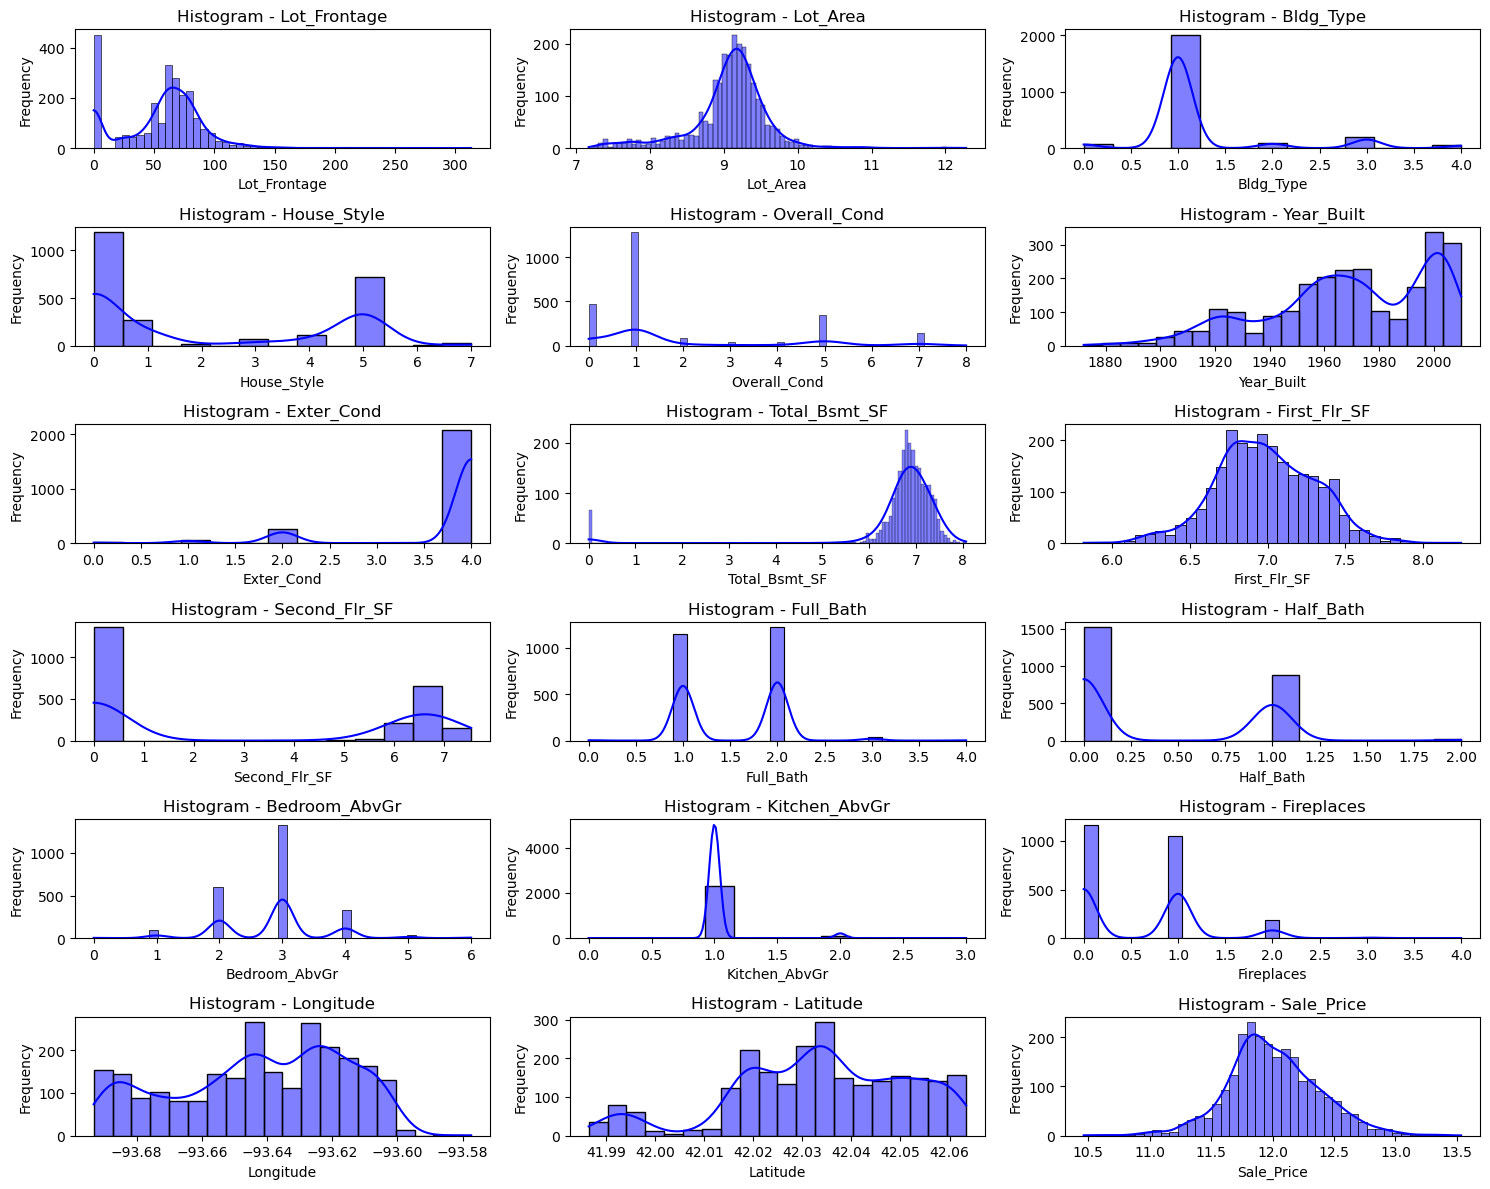

In [43]:
num_rows = 6  # Adjust the number of rows based on your requirement
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Set different colors for histogram and KDE
hist_color ='skyblue'
#element = {'color': 'skyblue', 'edgecolor': 'black'}
kde_color = 'black'

# Loop through each feature and plot a histogram
for i, feature in enumerate(df_log.columns):
    ax = axes[i]
    sns.histplot(df_log[feature], color='blue',kde=True, ax=ax, line_kws={'color': kde_color })
    ax.set_title(f'Histogram - {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()
plt.show()

In [44]:
features =['First_Flr_SF','Second_Flr_SF','Sale_Price']
print("Before transformation skewness value:")
for feature in features: 
    skewness = skew(housing_data_x[feature])
    print(f"Skewness of {feature}: {skewness}")


print("\nAfter transformation skewness value:")    
for feature in features: 
    skewness = skew(df_log[feature])
    print(f"Skewness of {feature}: {skewness}")

Before transformation skewness value:
Skewness of First_Flr_SF: 1.0426523952716684
Skewness of Second_Flr_SF: 0.8036178490279292
Skewness of Sale_Price: 1.7442728887821093

After transformation skewness value:
Skewness of First_Flr_SF: 0.02458490814713158
Skewness of Second_Flr_SF: 0.2688985850010641
Skewness of Sale_Price: 0.15576229285273233


In [45]:
from scipy import stats

features = ['Fireplaces', 'Year_Built', 'Full_Bath', 'First_Flr_SF', 'Total_Bsmt_SF']

# Calculate Z-scores for each specified feature
z_scores = df_log[features].apply(stats.zscore)

# Set a Z-score threshold for outlier removal considering 2 standard deviations
threshold_log = 2

# Identify outliers
outliers_log = (np.abs(z_scores) > threshold_log)

# Identify rows with at least one outlier
combined_outliers = outliers_log.any(axis=1)

# Count the total number of rows with at least one outlier
total_outliers_count = combined_outliers.sum()
print("Total number of rows with at least one outlier:", total_outliers_count)

# Remove rows with outliers
df_log_no_outliers = df_log[~combined_outliers].reset_index(drop=True)

# Display information
print("Before removing outliers, DataFrame size:", df_log.shape)
print("After removing outliers, DataFrame size:", df_log_no_outliers.shape)


Total number of rows with at least one outlier: 465
Before removing outliers, DataFrame size: (2413, 18)
After removing outliers, DataFrame size: (1948, 18)


###### Since removing the outliers using Z-score after applying tranformation would remove lot od data I am not going to remove the outliers but just train the data after the transformation has been done

## Traing the model for transformed data, predicting for test values, evaluating model and checking VIF value

In [46]:
independent_features2 = df_log.drop('Sale_Price', axis=1) 
dependent_features2 = df_log['Sale_Price']
print("Training the model\n")
model2,x_train2,x_test2,y_train2,y_test2 = train_ols_model(independent_features2,dependent_features2)
print(model2.summary())

print("\n\nPredicting y")
y_predict2 = predicting_value(model2,x_test2)

print("\n\nCalculating mae,mse")
calculate_mse_mae(y_test2,y_predict2)

print("\n\nCalculating multicollinearity with VIF")
calculate_vif(df_log.drop('Sale_Price', axis=1))

export_summary_pdf('model_two',model2)


Training the model

length of Train data 1809
length of Test data 604
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     499.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:46:32   Log-Likelihood:                 810.61
No. Observations:                1809   AIC:                            -1585.
Df Residuals:                    1791   BIC:                            -1486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

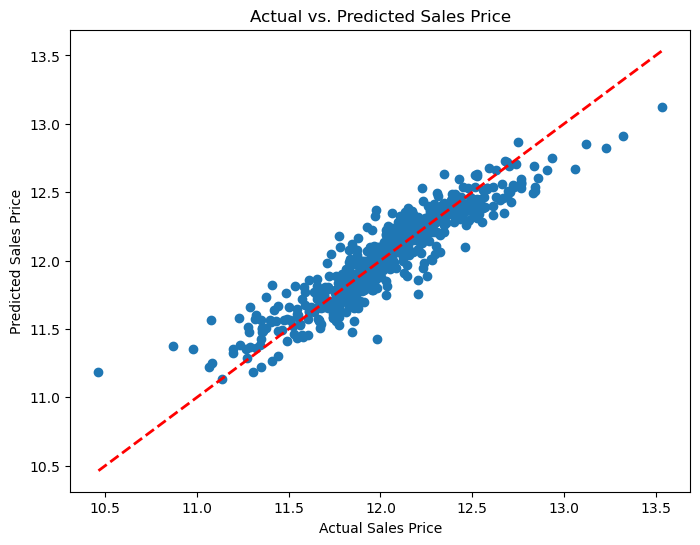

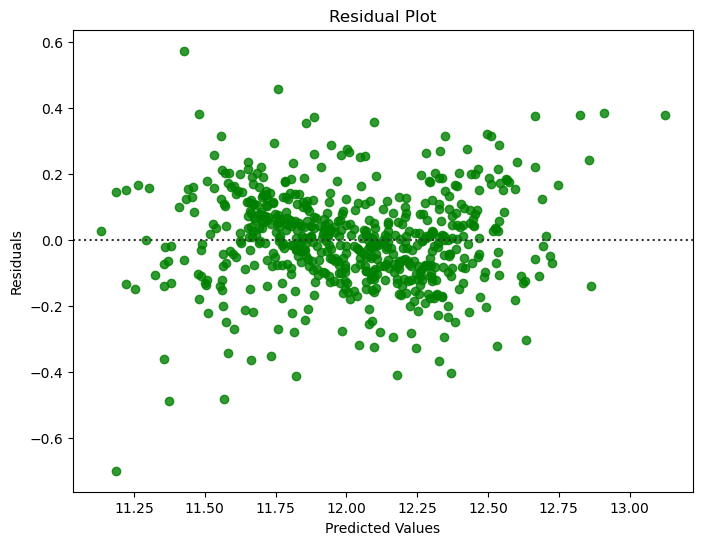

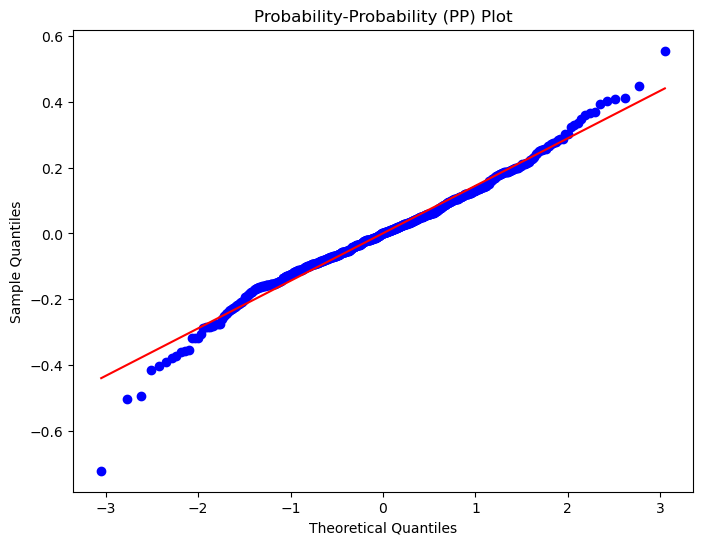

In [47]:
actual_predicted_plot("model Two actual_vs_predicted",y_test2, y_predict2)
residual2=residual_plot("model Two homoscidi",y_test2, y_predict2)
qq_plot("QQ plot with respect to model2",residual2)


## Removing the features from dataframe which have p-value greater than 0.05 in previous model

In [48]:
housing_datat=df_log.copy()
print("Removing the features which have p value greater than 0.05")
updated_housing_datat=removing_pgt5(model2,housing_datat)

Removing the features which have p value greater than 0.05
Original DataFrame shape: (2413, 18)
DataFrame shape after feature selection: (2413, 15)


## Calculating VIF after features removal ideal it shouldn't have values greater than 9

In [49]:
print("Calculating multicollinearity with VIF")
calculate_vif(updated_housing_datat.drop('Sale_Price', axis=1))

Calculating multicollinearity with VIF
VIF Data in Descending Order:
         Variable       VIF
8   Second_Flr_SF  4.590930
3     House_Style  3.196260
7    First_Flr_SF  2.994800
9       Full_Bath  2.399516
5      Year_Built  2.145272
10      Half_Bath  2.107262
11  Bedroom_AbvGr  1.789548
1        Lot_Area  1.709412
13     Fireplaces  1.436522
2       Bldg_Type  1.334969
12  Kitchen_AbvGr  1.245345
4    Overall_Cond  1.202126
6   Total_Bsmt_SF  1.159611
0    Lot_Frontage  1.104317


## Traing the model after removing features: predicting for test values, evaluating model 

In [50]:
independent_features3 = updated_housing_datat.drop('Sale_Price', axis=1) 
dependent_features3 = updated_housing_datat['Sale_Price']
print("Training the model\n")
model3,x_train3,x_test3,y_train3,y_test3 = train_ols_model(independent_features3,dependent_features3)

print(model3.summary())
print("\n\nPredicting y")

y_predict3 = predicting_value(model3,x_test3)

print("\n\nCalculating mae,mse")
calculate_mse_mae(y_test3,y_predict3)

export_summary_pdf('model_three',model3)

Training the model

length of Train data 1809
length of Test data 604
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     605.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:46:34   Log-Likelihood:                 808.08
No. Observations:                1809   AIC:                            -1586.
Df Residuals:                    1794   BIC:                            -1504.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [51]:
corr = updated_housing_datat.corr()
print (corr['Sale_Price'].sort_values(ascending=False))

Sale_Price       1.000000
First_Flr_SF     0.619169
Year_Built       0.586988
Full_Bath        0.580104
Fireplaces       0.508728
Lot_Area         0.386870
Total_Bsmt_SF    0.374392
Half_Bath        0.315180
Bedroom_AbvGr    0.224242
House_Style      0.194331
Second_Flr_SF    0.154974
Lot_Frontage     0.132630
Bldg_Type       -0.040795
Kitchen_AbvGr   -0.125120
Overall_Cond    -0.155770
Name: Sale_Price, dtype: float64


## Visualizing correlation matrix

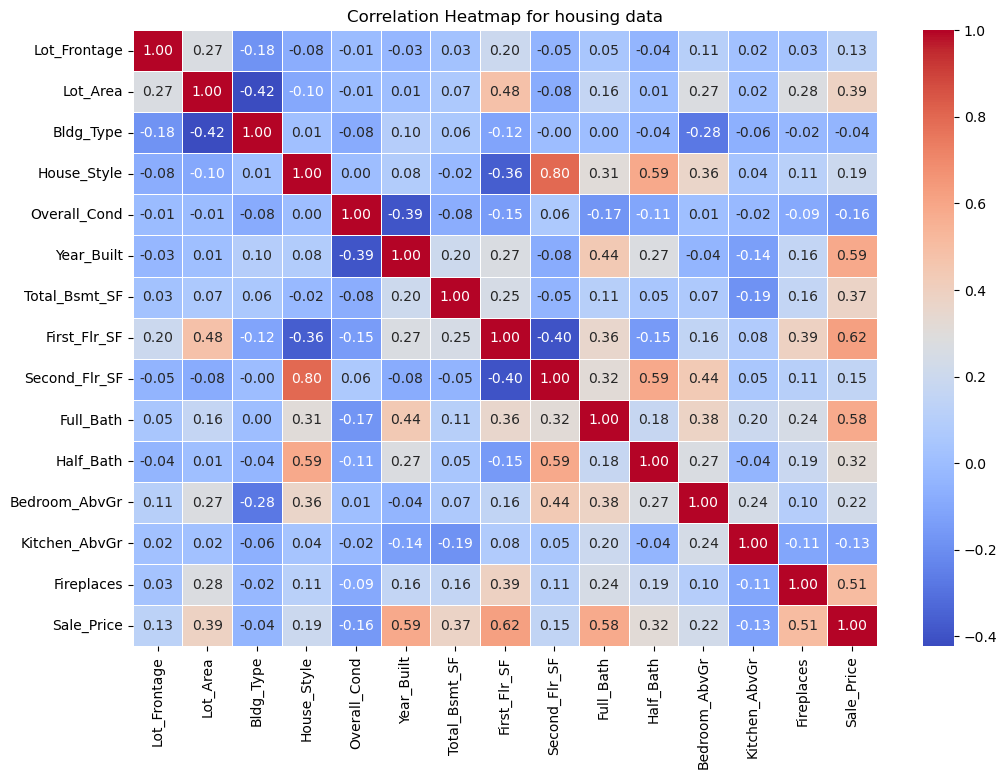

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(updated_housing_datat.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for housing data')
plt.show()

## Calculating F-static for above model

In [53]:
f_statistic = model3.fvalue
p_value = model3.f_pvalue

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 605.531351768582
P-value: 0.0


## Shapiro-Wilk test for normality of residuals

In [54]:
shapiro_test = stats.shapiro(model3.resid)
 
print(f'Shapiro-Wilk p-value: {shapiro_test.pvalue}')

Shapiro-Wilk p-value: 2.062394201155193e-17


## Visually assessing how well the model predictions align with the actual observed values

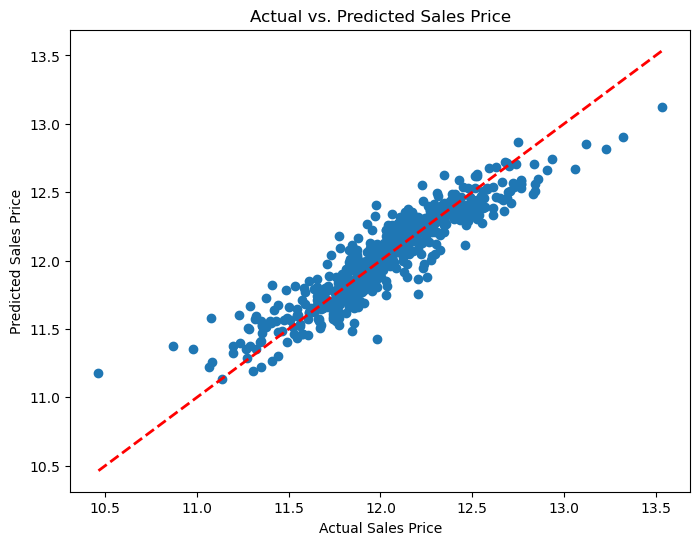

In [55]:
actual_predicted_plot("Model3_act_predicted",y_test3,y_predict3)

## Plotting residual plot

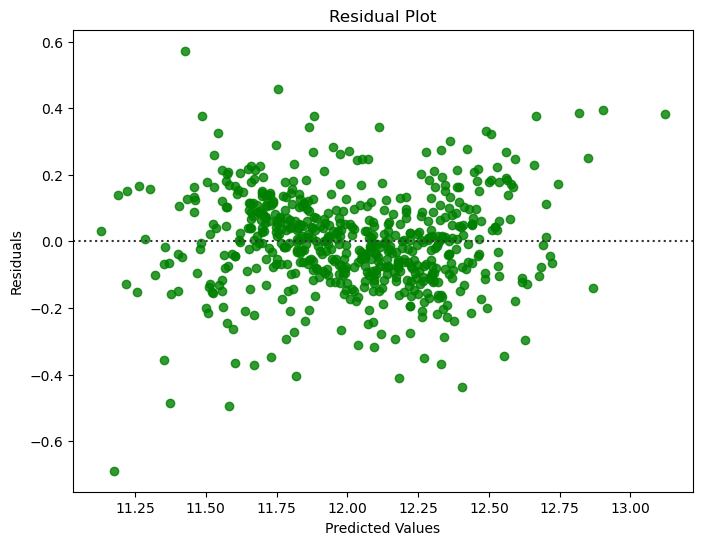

In [56]:
residual3=residual_plot("Model3_homos",y_test3, y_predict3)

## Plotting qq plot

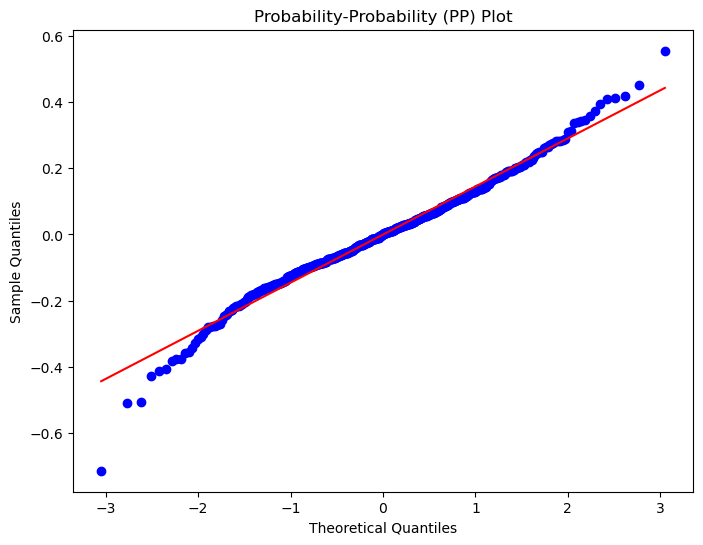

In [57]:
qq_plot("Model3_residual",residual3)

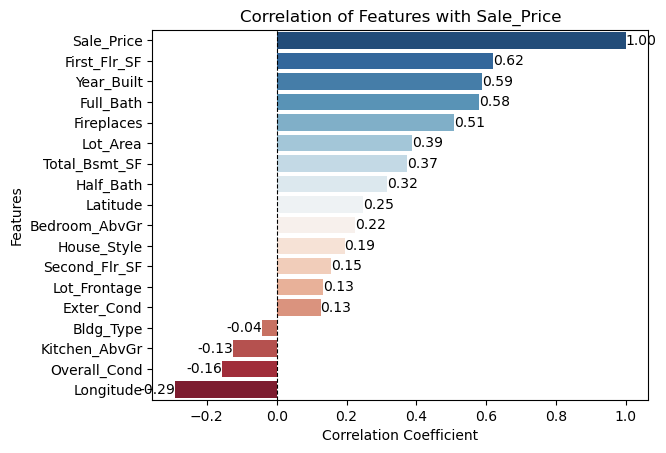

In [58]:
correlation_matrix = housing_datat.corr()

sorted_corr = correlation_matrix['Sale_Price'].sort_values(ascending=False)

sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='RdBu_r')

# Set the title and labels
plt.title('Correlation of Features with Sale_Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)

# Create a diverging bar plot
bar_plot = sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='RdBu_r')

# Annotate bars with correlation coefficients
for i, value in enumerate(sorted_corr.values):
    bar_plot.text(value, i, f'{value:.2f}', ha='left' if value > 0 else 'right', va='center')

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\Figure17_upd_housing_datat_correlation.jpg')

# Show the bar plot
plt.show()

## Removing Bldg_Type feature as it has less correlation with respect to sale price and traing the model, predicting values, evaluating the model and checking VIF value

In [59]:
independent_features4 = updated_housing_datat.drop(['Sale_Price','Bldg_Type'], axis=1) 
dependent_features4 = updated_housing_datat['Sale_Price']
print("Training the model\n")
model4,x_train4,x_test4,y_train4,y_test4 = train_ols_model(independent_features4,dependent_features4)

print(model4.summary())
print("\n\nPredicting y")

y_predict4 = predicting_value(model4,x_test4)

print("\n\nCalculating mae,mse")
calculate_mse_mae(y_test4,y_predict4)

print("\n\nCalculating multicollinearity with VIF")
calculate_vif(updated_housing_datat.drop(['Sale_Price','Bldg_Type'], axis=1))

export_summary_pdf('model_four',model4)

Training the model

length of Train data 1809
length of Test data 604
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     650.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:46:38   Log-Likelihood:                 805.59
No. Observations:                1809   AIC:                            -1583.
Df Residuals:                    1795   BIC:                            -1506.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

## Visualising how well predicted values are with respect to test values, residual pot and qq/pp-plot for above model

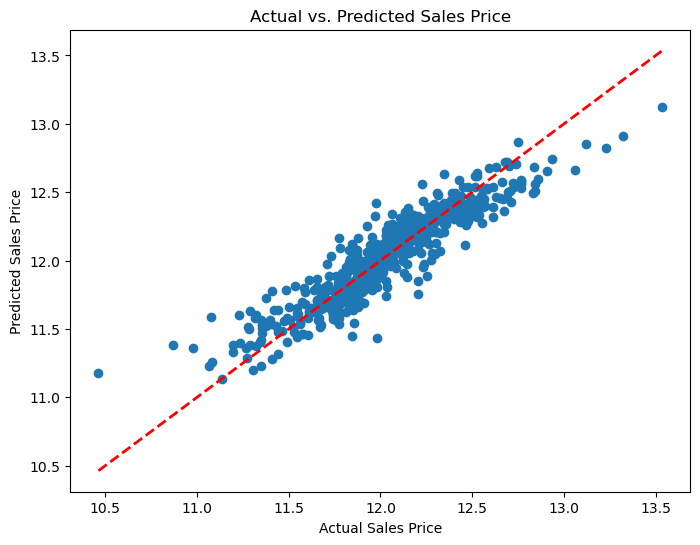

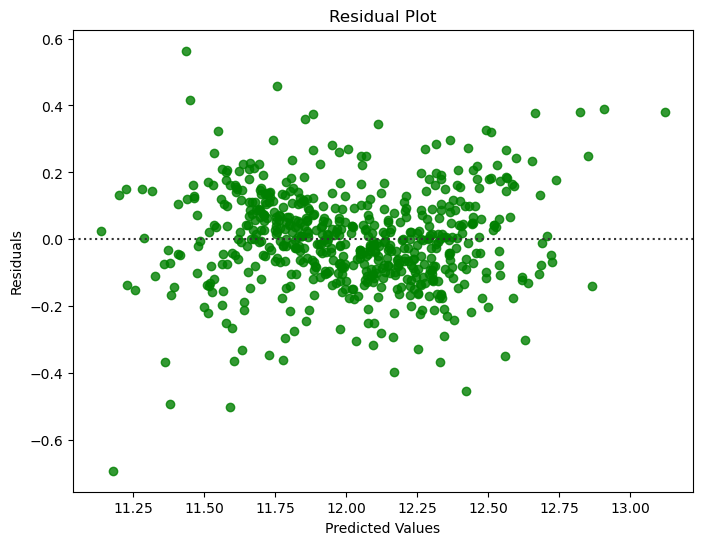

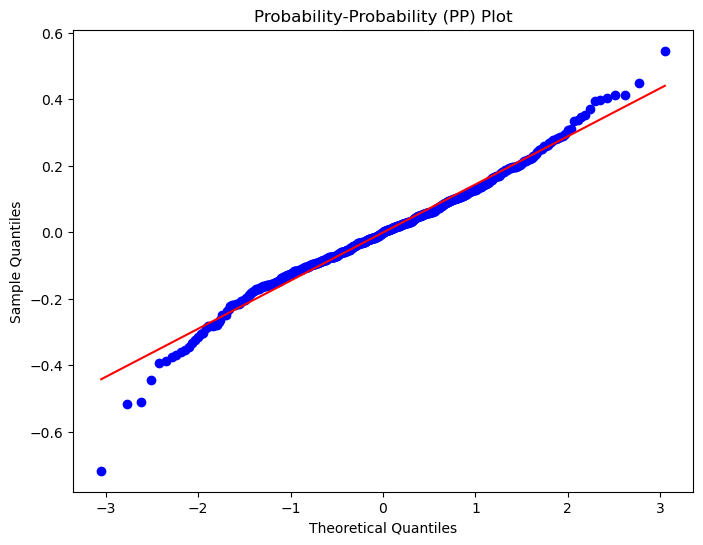

In [60]:
actual_predicted_plot("model4_pred_act",y_test4,y_predict4)
residual4=residual_plot("model4 homos",y_test4, y_predict4)
qq_plot("model4 residual",residual4)

In [61]:
import numpy as np
import statsmodels.api as sm

def cooks_distance(residual, model):
    cooks_d = (residual**2) / (model.df_model * model.mse_resid)
    return cooks_d
    
cooks_d = cooks_distance(residual4,model4)
# Assuming you have 'residual4' and 'model4' defined somewhere
for i, cooksd_value in enumerate(cooks_d):
    if cooksd_value > 1.0:
        print(f"Observation {i + 1}: Cook's Distance = {cooksd_value}")

Observation 588: Cook's Distance = 1.632737835801739


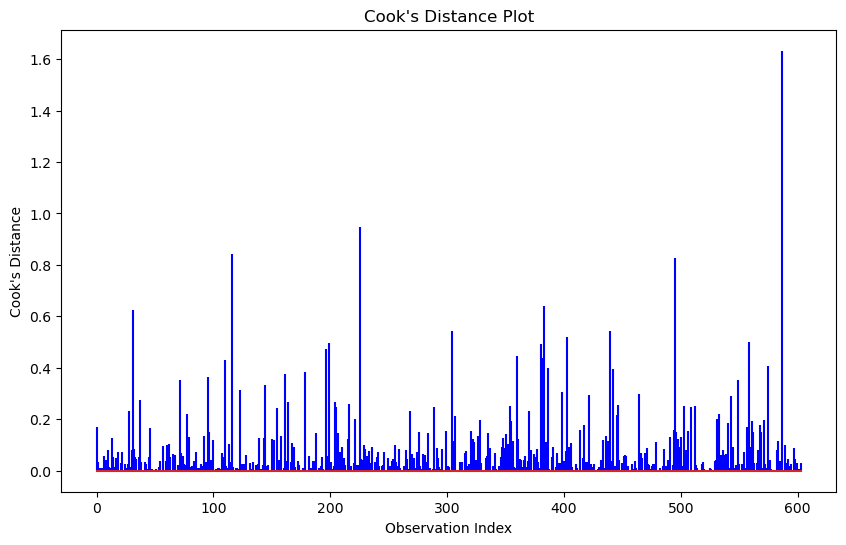

In [62]:
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=' ', linefmt='b-')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\model4_cook_distance.jpg')
plt.show()

## Trying to train model again by removing Overall_cond feature , predicting and evaluating the model

In [63]:
independent_features5 = updated_housing_datat.drop(['Sale_Price','Bldg_Type','Overall_Cond'], axis=1) 
dependent_features5 = updated_housing_datat['Sale_Price']
print("Training the model\n")
model5,x_train5,x_test5,y_train5,y_test5 = train_ols_model(independent_features5,dependent_features5)

print(model5.summary())
print("\n\nPredicting y")

y_predict5 = predicting_value(model5,x_test5)

print("\n\nCalculating mae,mse")
calculate_mse_mae(y_test5,y_predict5)

print("\n\nCalculating multicollinearity with VIF")
calculate_vif(updated_housing_datat.drop(['Sale_Price','Bldg_Type','Overall_Cond'], axis=1))

export_summary_pdf('model_five',model5)

Training the model

length of Train data 1809
length of Test data 604
                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     662.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:                 760.00
No. Observations:                1809   AIC:                            -1494.
Df Residuals:                    1796   BIC:                            -1422.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

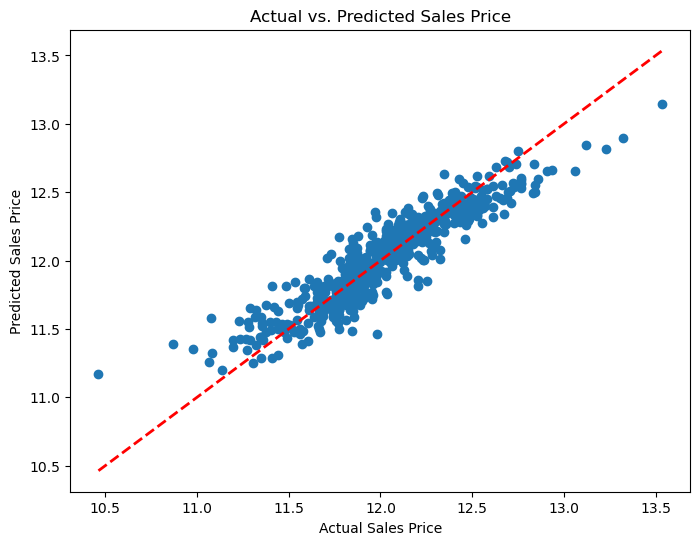

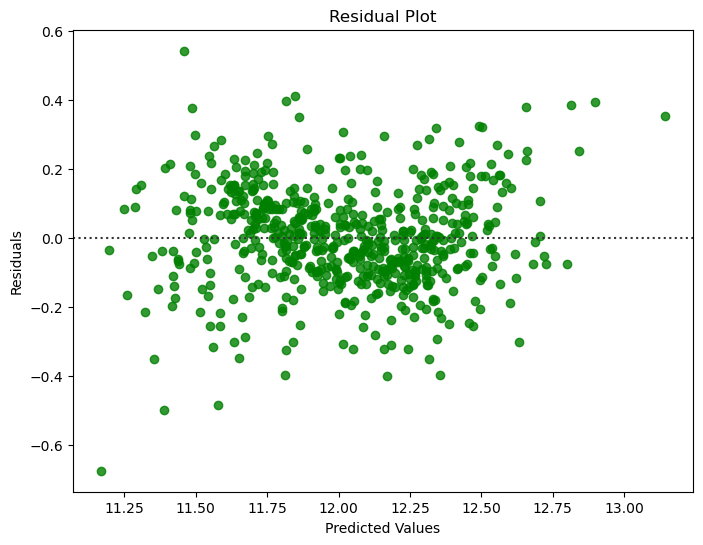

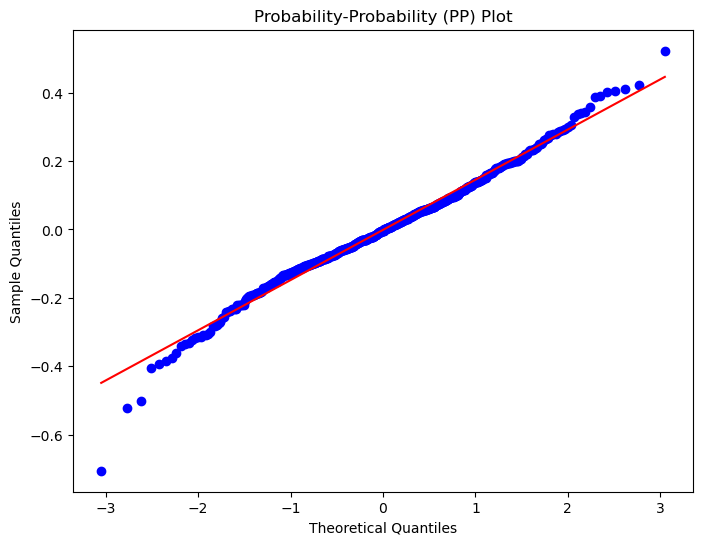

In [64]:
actual_predicted_plot("model5_pred_act",y_test5,y_predict5)
residual5=residual_plot("model5 homos",y_test5, y_predict5)
qq_plot("model5 residual",residual5)

Observation 588: Cook's Distance = 1.6319103769429728


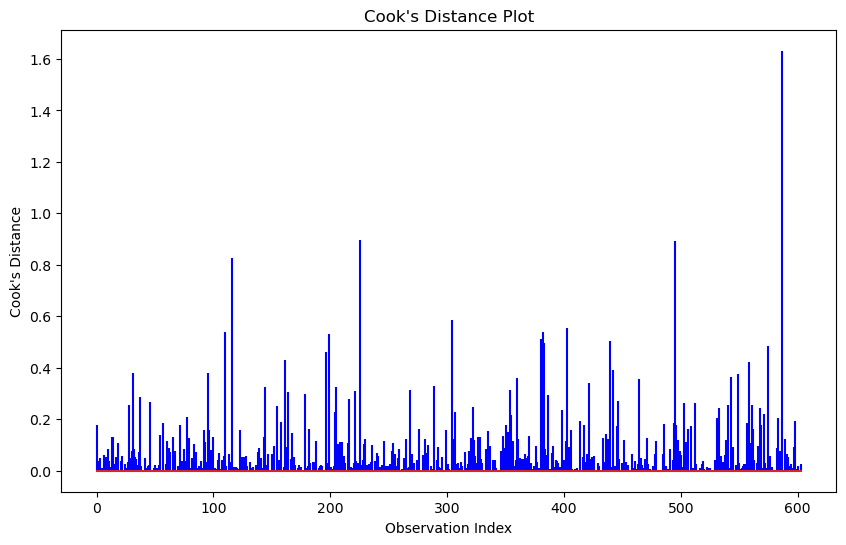

In [65]:
cooks_d = cooks_distance(residual5,model5)
# Assuming you have 'residual4' and 'model4' defined somewhere
for i, cooksd_value in enumerate(cooks_d):
    if cooksd_value > 1.0:
        print(f"Observation {i + 1}: Cook's Distance = {cooksd_value}")
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=' ', linefmt='b-')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\model5_cook_distance.jpg')
plt.show()